# **pandas를 사용해 금융 시장 데이터를 분석하고 변환하기**

pandas 라이브러리는 **AQR Capital Management** 투자 관리 회사에서 거시 및 신용 거래 전략을 연구하던 웨스 맥키니(Wes McKinney)에 의해 개발되었습니다. 그는 데이터 분석을 위해 유연하고 사용하기 쉬운 데이터 구조를 만들었으며, pandas가 2009년에 오픈 소스로 공개된 이후, Python에서 데이터를 분석하고 변환하는 표준 도구로 자리 잡았습니다.

pandas는 스프레드시트나 데이터베이스에 저장된 것과 같은 표 형식의 데이터를 다루는 데 매우 적합하며, Python 생태계 내 다른 데이터 분석 라이브러리와도 잘 통합됩니다. pandas는 누락된 데이터를 처리하고, 데이터를 재구성하며, 데이터를 병합하고 결합하는 기능을 제공하며, 또한 파일 시스템의 데이터, Excel 파일, 데이터베이스, HDF5 파일 형식과 같은 포맷의 데이터를 불러오는 강력한 도구를 제공합니다. pandas는 풍부한 기능과 사용 용이성 덕분에 학계, 금융업계 및 다양한 비즈니스 분야에서 널리 사용됩니다.

이 장에서는 pandas 데이터 구조를 구축하는 데 도움이 되는 다양한 기법을 다룰 것입니다. 주로 데이터프레임(DataFrame)과 시리즈(Series), pandas의 두 주요 데이터 구조에 초점을 맞출 것입니다. 이러한 구조가 슬라이싱, 인덱싱 및 대규모 데이터셋의 서브셋 추출과 같은 다양한 작업에 어떻게 활용되는지 배울 것입니다. 이는 알고리즘 트레이딩에 매우 중요합니다. 이후, 데이터프레임에서 데이터를 검사하고 선택하는 방법을 배우게 됩니다.

pandas를 활용해 데이터를 조작하는 방법에 대해 충분히 익힌 후에는 알고리즘 트레이딩에 일반적으로 사용되는 분석 기법을 다룰 것입니다. 여기에는 자산 수익률과 수익률 시리즈의 변동성을 계산하는 방법이 포함됩니다. 또한 누적 수익률 시리즈를 생성하고 데이터를 서로 다른 시간 프레임으로 리샘플링하는 방법을 배워 다양한 시간 단위에서 데이터를 분석할 수 있는 유연성을 제공할 것입니다. 실제 데이터셋에서 흔히 발생하는 누락 데이터를 처리하는 방법도 배울 것입니다.

마지막으로, 이 장에서는 사용자 정의 함수를 시간 시리즈 데이터에 적용하는 방법을 다룰 것입니다. 이 장 전체에서 pandas가 **Matplotlib**(데이터 시각화), **NumPy**(수치 연산), 그리고 **Scikit-Learn**(머신러닝)과 같은 과학적 Python 생태계의 다른 라이브러리와 어떻게 통합되는지 확인할 수 있을 것입니다.

이 장에서 다룰 주요 주제는 다음과 같습니다:

- pandas 인덱스 타입 탐구하기  
- pandas 시리즈와 데이터프레임 구축하기  
- 데이터프레임 조작 및 변환하기  
- 데이터프레임에서 데이터 검사 및 선택하기  
- pandas를 사용해 자산 수익률 계산하기  
- 수익률 시리즈 변동성 측정하기  
- 누적 수익률 시리즈 생성하기  
- 다른 시간 프레임으로 데이터 리샘플링하기  
- 누락된 데이터 문제 해결하기  
- 시간 시리즈 데이터를 분석하는 사용자 정의 함수 적용하기  

## **pandas 인덱스 타입 탐구하기**

인덱스(Index)는 **불변(immutable)** 시퀀스로, 데이터프레임의 행이나 시리즈의 요소에 대한 **레이블 또는 키 역할**을 하는 **인덱싱 및 정렬**에 사용됩니다. 이를 통해 빠른 조회와 관계 연산이 가능하며, pandas 버전 2부터는 **정수형, 문자열, 튜플** 등 모든 유형의 값을 포함할 수 있습니다. pandas의 인덱스는 불변이기 때문에 여러 데이터프레임이나 시리즈 간에 안전하게 공유할 수 있습니다. 또한 pandas는 **정렬, 그룹화, 합집합 및 교집합**과 같은 일반 작업에 사용할 수 있는 여러 내장 메서드를 제공하며, **다중 인덱스(MultiIndex)**를 지원하여 옵션 체인과 같은 **고차원 데이터**를 처리할 수 있습니다. 이 장에서는 MultiIndex의 예제도 다룰 것입니다.  

pandas에는 **7가지 인덱스 타입**이 있으며, 이는 생성할 때 사용된 데이터 유형에 따라 달라집니다. 예를 들어, **Int64Index**는 64비트 정수로 이루어진 인덱스입니다. pandas는 데이터를 기반으로 올바른 인덱스 타입을 자동으로 선택할 만큼 스마트합니다.  

### **어떻게 해야 할까…**  

간단한 정수 시퀀스를 사용해 인덱스를 만들어보겠습니다:

1. **pandas**를 일반적인 별칭 **pd**로 불러옵니다:  

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

2. **Index 클래스**를 인스턴스화합니다:  

Creates an index with integers from 0 to 9 and displays it

In [2]:
idx_1 = pd.Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3. 인덱스를 확인합니다:  

다음 코드를 실행하면 다음과 같은 인덱스가 생성되며 타입이 출력됩니다:  

In [3]:
display(idx_1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

### **작동 원리…**  

이는 pandas 인덱스를 생성하는 **가장 간단한 예제**입니다. `Index` 클래스를 사용해 **1차원 배열 또는 배열과 같은 데이터 구조**에 값을 넣어서 인덱스를 생성할 수 있습니다.

### **더 알아보기…**  

pandas는 다양한 **인덱스 타입**을 제공하여 많은 사용 사례를 지원합니다. 여기에는 시간 시리즈 분석과 관련된 인덱스도 포함됩니다. 가장 자주 사용되는 몇 가지 인덱스 유형을 살펴보겠습니다:


**DatetimeIndex**  

더 흥미로운 인덱스 타입은 **DatetimeIndex**입니다. 이 인덱스는 **시간 시리즈 데이터**를 다룰 때 매우 유용합니다:  

Generates a date range with daily frequency starting from 2016-01-01 for 6 periods and displays it

In [4]:
days = pd.date_range("2016-01-01", periods=6, freq="D")

다음 코드는 **2016-01-01**부터 시작하는 **6개 날짜**로 이루어진 인덱스를 생성합니다.

In [5]:
display(days)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

**다양한 주기**(frequency)를 사용할 수 있으며, 예를 들어 **초(second)** 단위는 다음과 같습니다:  

Generates a date range with second frequency starting from 2016-01-01 for 100 periods and displays it

In [6]:
seconds = pd.date_range("2016-01-01", periods=100, freq="s")

In [7]:
display(seconds)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09',
               '2016-01-01 00:00:10', '2016-01-01 00:00:11',
               '2016-01-01 00:00:12', '2016-01-01 00:00:13',
               '2016-01-01 00:00:14', '2016-01-01 00:00:15',
               '2016-01-01 00:00:16', '2016-01-01 00:00:17',
               '2016-01-01 00:00:18', '2016-01-01 00:00:19',
               '2016-01-01 00:00:20', '2016-01-01 00:00:21',
               '2016-01-01 00:00:22', '2016-01-01 00:00:23',
               '2016-01-01 00:00:24', '2016-01-01 00:00:25',
               '2016-01-01 00:00:26', '2016-01-01 00:00:27',
               '2016-01-01 00:00:28', '2016-01-01 00:00:29',
               '2016-01-01 00:00:30', '2016-01-01 00:00:31',
               '2016-01-

DatetimeIndex는 기본적으로 **시간대 정보가 없습니다(“timezone naive”)**. 시간대 정보가 필요하다면 **`tz_localize`**를 사용해 **로컬화**할 수 있습니다:  

Localizes the seconds date range to UTC timezone and displays it

In [8]:
seconds_utc = seconds.tz_localize("UTC")

시간대가 다른 지역으로 시간을 조정하려면 **`tz_convert`**를 사용할 수 있습니다:  

In [9]:
display(seconds_utc)

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-01 00:00:01+00:00',
               '2016-01-01 00:00:02+00:00', '2016-01-01 00:00:03+00:00',
               '2016-01-01 00:00:04+00:00', '2016-01-01 00:00:05+00:00',
               '2016-01-01 00:00:06+00:00', '2016-01-01 00:00:07+00:00',
               '2016-01-01 00:00:08+00:00', '2016-01-01 00:00:09+00:00',
               '2016-01-01 00:00:10+00:00', '2016-01-01 00:00:11+00:00',
               '2016-01-01 00:00:12+00:00', '2016-01-01 00:00:13+00:00',
               '2016-01-01 00:00:14+00:00', '2016-01-01 00:00:15+00:00',
               '2016-01-01 00:00:16+00:00', '2016-01-01 00:00:17+00:00',
               '2016-01-01 00:00:18+00:00', '2016-01-01 00:00:19+00:00',
               '2016-01-01 00:00:20+00:00', '2016-01-01 00:00:21+00:00',
               '2016-01-01 00:00:22+00:00', '2016-01-01 00:00:23+00:00',
               '2016-01-01 00:00:24+00:00', '2016-01-01 00:00:25+00:00',
               '2016-01-01 00:00:26+00:00', '2016-0

Converts the UTC localized date range to US/Eastern timezone and displays it

In [10]:
seconds_est = seconds_utc.tz_convert("US/Eastern")

In [11]:
display(seconds_est)

DatetimeIndex(['2015-12-31 19:00:00-05:00', '2015-12-31 19:00:01-05:00',
               '2015-12-31 19:00:02-05:00', '2015-12-31 19:00:03-05:00',
               '2015-12-31 19:00:04-05:00', '2015-12-31 19:00:05-05:00',
               '2015-12-31 19:00:06-05:00', '2015-12-31 19:00:07-05:00',
               '2015-12-31 19:00:08-05:00', '2015-12-31 19:00:09-05:00',
               '2015-12-31 19:00:10-05:00', '2015-12-31 19:00:11-05:00',
               '2015-12-31 19:00:12-05:00', '2015-12-31 19:00:13-05:00',
               '2015-12-31 19:00:14-05:00', '2015-12-31 19:00:15-05:00',
               '2015-12-31 19:00:16-05:00', '2015-12-31 19:00:17-05:00',
               '2015-12-31 19:00:18-05:00', '2015-12-31 19:00:19-05:00',
               '2015-12-31 19:00:20-05:00', '2015-12-31 19:00:21-05:00',
               '2015-12-31 19:00:22-05:00', '2015-12-31 19:00:23-05:00',
               '2015-12-31 19:00:24-05:00', '2015-12-31 19:00:25-05:00',
               '2015-12-31 19:00:26-05:00', '2015-1

**PeriodIndex**  

pandas의 **`period_range`** 메서드를 사용하면 **분기**(quarters)와 같은 기간 인덱스를 생성할 수 있습니다:  

Generates a period range with quarterly frequency ending in November from 1990Q1 to 2000Q4 and displays it

In [12]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

위 코드는 **1990년 1분기**부터 **2000년 4분기**까지의 기간을 생성하며, 각 분기는 **11월**에 끝납니다.

In [13]:
display(prng)

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

**MultiIndex**  

**MultiIndex**는 계층적 인덱스로도 알려져 있으며, pandas의 데이터프레임과 시리즈 내에서 **복잡한 데이터 조직화**를 가능하게 하는 데이터 구조입니다. 이는 데이터가 여러 차원을 가로지르도록 표현할 수 있게 하며, 기본적으로 **2차원** 구조를 가지는 데이터프레임에서도 **다중 레벨 인덱스**를 허용합니다. MultiIndex의 자세한 내용은 이 책의 뒷부분에서 다룰 예정이므로, 지금 당장 명확하게 이해되지 않아도 걱정하지 않아도 됩니다.  

MultiIndex 객체를 생성하려면 **`from_tuples`** 메서드에 튜플 목록을 전달하면 됩니다:  

Creates a MultiIndex from a list of tuples with date and symbol, and displays it

In [14]:
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT"),
]
midx = pd.MultiIndex.from_tuples(tuples, names=("date", "symbol"))

MultiIndex 객체를 생성하는 방법은 여러 가지가 있습니다. 이 예제에서는 **튜플 목록**을 사용했습니다. 각 튜플은 pandas의 **타임스탬프(timestamp)**와 **티커 심볼(ticker symbol)**을 포함합니다. 튜플 목록을 사용하여 `from_tuples` 메서드를 호출하면 **MultiIndex** 객체가 생성됩니다. 결과적으로 **계층적 데이터프레임**을 지원하는 2차원 인덱스를 얻게 됩니다.  

In [15]:
display(midx)

MultiIndex([('2023-07-10', 'WMT'),
            ('2023-07-10', 'JPM'),
            ('2023-07-10', 'TGT'),
            ('2023-07-11', 'WMT'),
            ('2023-07-11', 'JPM'),
            ('2023-07-11', 'TGT')],
           names=['date', 'symbol'])

> **중요한 참고사항**  
> `from_tuples` 메서드에서 **names** 인자를 사용하면 **레이블 기반 인덱싱**을 위해 인덱스 열에 이름을 부여할 수 있습니다. 이는 **선택 사항**입니다.

### **참고 자료**  

pandas 문서는 매우 자세하게 구성되어 있습니다. 이 레시피에서 다룬 인덱스 타입에 대해 더 알고 싶다면 아래의 자료를 참고하세요:  

- pandas 인덱스 문서: [https://pandas.pydata.org/docs/reference/api/pandas.Index.html](https://pandas.pydata.org/docs/reference/api/pandas.Index.html)  
- pandas DatetimeIndex 문서: [https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)  
- pandas MultiIndex 문서: [https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html)  

## **pandas 시리즈와 데이터프레임 만들기**  

**시리즈(Series)**는 **1차원 레이블 배열**로, 정수, 실수, 문자열, 객체 등 **어떠한 데이터 타입**도 포함할 수 있습니다. Series의 축 레이블은 **인덱스(index)**라고 하며, 이는 데이터 조작 및 접근을 매우 쉽게 만들어줍니다. pandas Series의 핵심 기능 중 하나는 **누락된 데이터**를 처리하는 기능으로, 이는 **NumPy의 `nan`** (Not a Number)으로 표현됩니다.  

---

> **중요**  
> NumPy의 **`nan`**은 **특별한 부동 소수점 값**입니다. 이는 수치 데이터셋에서 누락된 데이터를 표시하는 데 흔히 사용됩니다. `nan`은 **부동 소수점 값**이기 때문에 수치 연산이나 함수에 유용하게 사용될 수 있습니다. 하지만 다른 값들과는 다르게 **`nan`은 어떤 값과도 같지 않습니다**. 따라서 `nan`을 찾으려면 **`numpy.isnan()`**이나 **`pandas.isna()`**와 같은 함수를 사용해야 합니다.  

---

**Series** 객체는 **통계 함수, 문자열 조작, 시각화**와 같은 다양한 작업을 수행할 수 있는 많은 메서드를 제공합니다.  

**데이터프레임(DataFrame)**은 **2차원 데이터 구조**로, 행과 열을 가진 스프레드시트와 비슷합니다. 본질적으로 **표 형식**의 데이터를 표현하며, 숫자와 문자열 같은 서로 다른 타입의 데이터를 가질 수 있습니다. DataFrame은 데이터를 **집계, 슬라이싱, 인덱싱, 병합, 재구성** 등 다양한 방식으로 쉽게 조작할 수 있게 합니다. 또한, 누락된 데이터를 유연하게 처리할 수 있는 기능을 제공하여 **누락 데이터 필터링, 채우기, 조작**을 편리하게 수행할 수 있습니다.

---

### **준비하기**  

Series와 DataFrame을 만들기 전에, **이전 예제**를 완료하고 **인덱스**를 메모리에 저장했는지 확인하세요.

### **어떻게 해야 할까…**  

다음 단계를 실행하여 여러 **Series**로 구성된 **DataFrame**을 생성합니다:

1. **NumPy**를 가져와 정규 분포를 따르는 난수를 생성합니다:  

In [14]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [15]:
obb.user.preferences.output_type = "dataframe"

Generates a date range with second frequency starting from 2016-01-01 for 100 periods and displays it

In [16]:
seconds = pd.date_range("2016-01-01", periods=100, freq="s")

In [17]:
display(seconds)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09',
               '2016-01-01 00:00:10', '2016-01-01 00:00:11',
               '2016-01-01 00:00:12', '2016-01-01 00:00:13',
               '2016-01-01 00:00:14', '2016-01-01 00:00:15',
               '2016-01-01 00:00:16', '2016-01-01 00:00:17',
               '2016-01-01 00:00:18', '2016-01-01 00:00:19',
               '2016-01-01 00:00:20', '2016-01-01 00:00:21',
               '2016-01-01 00:00:22', '2016-01-01 00:00:23',
               '2016-01-01 00:00:24', '2016-01-01 00:00:25',
               '2016-01-01 00:00:26', '2016-01-01 00:00:27',
               '2016-01-01 00:00:28', '2016-01-01 00:00:29',
               '2016-01-01 00:00:30', '2016-01-01 00:00:31',
               '2016-01-

2. **DatetimeIndex** 길이와 동일한 길이의 정규 분포를 따르는 난수를 반환하는 함수를 생성합니다:  

Defines a function 'rnd' that returns an array of 100 random numbers

In [18]:
def rnd():
    return np.random.randn(
        100,
    )

위 함수의 반환값은 길이가 **100인 NumPy 배열**입니다. 이 배열은 **정규 분포에서 추출된 난수**로 채워지며, 함수를 호출할 때마다 서로 다른 값 세트를 반환합니다.

> **팁**  
> pandas를 사용할 때, Series와 DataFrame을 **테스트 목적으로 난수로 채우는 것이 일반적**입니다.

3. **DataFrame**을 생성할 **세 개의 pandas Series**를 만듭니다:  

Creates three pandas Series with random data and the previously generated seconds as index

In [19]:
s_1 = pd.Series(rnd(), index=seconds)
s_2 = pd.Series(rnd(), index=seconds)
s_3 = pd.Series(rnd(), index=seconds)

여기서, 이전 예제에서 만든 **DatetimeIndex**를 각 Series의 인덱스로 사용합니다. 이렇게 하면 각 열이 **공통 인덱스**를 기준으로 정렬됩니다.  

4. **딕셔너리**를 사용해 DataFrame을 생성합니다:  

Creates a DataFrame 'df' from the three Series and displays it

In [21]:
df = pd.DataFrame({"a": s_1, "b": s_2, "c": s_3})

결과는 **DatetimeIndex**를 가지고 **초 단위 해상도**로 정렬된 3개의 열을 가진 DataFrame이 됩니다. 각 열은 **정규 분포에서 추출된 난수**로 채워집니다.  

In [22]:
display(df)

a         b         c
2016-01-01 00:00:00 -0.077455  1.206853 -0.013546
2016-01-01 00:00:01  0.635481 -0.562480  2.678270
2016-01-01 00:00:02 -0.111695  1.075382  0.081674
2016-01-01 00:00:03 -1.005153  0.138402 -0.677011
2016-01-01 00:00:04  2.548977 -2.038370  2.619485
...                       ...       ...       ...
2016-01-01 00:01:35 -1.343987 -1.644441 -1.322538
2016-01-01 00:01:36 -0.116590  0.727375  0.432405
2016-01-01 00:01:37  0.968832  0.873063  0.733139
2016-01-01 00:01:38 -0.556532 -1.333532  0.177553
2016-01-01 00:01:39  0.520868  0.427931  0.281937

[100 rows x 3 columns]

### **작동 원리…**  

pandas의 **Series와 DataFrame**은 다양한 방식으로 생성할 수 있습니다. Series는 **배열과 유사한 객체**(예: 리스트, 튜플), 딕셔너리, 스칼라 값을 사용해 만들 수 있습니다. 이 예제에서는 **NumPy 배열과 유사한 객체**를 생성했으며, 이전 예제에서 만든 **DatetimeIndex**를 전달했습니다. 이 인덱스의 길이는 Series를 생성할 때 사용된 배열의 길이와 동일합니다.  

**DataFrame**은 **다차원 구조화된 객체**나 **이터러블**(iterable), **딕셔너리**, 또는 다른 **DataFrame**을 받을 수 있습니다. 이 예제에서는 **Python 딕셔너리**를 전달했으며, 이는 **키-값 쌍**의 리스트입니다. 각 키는 **열(column) 이름**을 나타내고, 각 값은 그 열의 데이터를 나타냅니다.  

DataFrame은 `index` 인자를 받아들여, 입력 데이터에 인덱스가 없는 경우에도 인덱스를 구조화할 수 있습니다. `columns` 인자를 사용하면 열의 이름을 설정할 수도 있습니다. Series에 포함된 인덱스를 사용하면 pandas는 자동으로 DataFrame 인덱스를 생성하고 값을 적절하게 정렬합니다. 만약 인덱스에 누락된 데이터가 있다면, pandas는 여전히 인덱스를 포함하되 값은 **`NaN`**으로 채웁니다.  

---

### **더 알아보기…**  

**MultiIndex** 객체는 **다차원 인덱스**로, DataFrame에 유연성을 추가합니다. **MultiIndex DataFrame**은 처음부터 새로 생성하거나 기존 DataFrame을 **“재인덱싱(reindex)”**하여 만들 수 있습니다.

**처음부터 MultiIndex DataFrame 만들기**  

이전 예제에서 생성한 **MultiIndex** 객체를 다시 사용합니다:  

Creates a list of tuples with date and symbol

In [23]:
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT"),
]
midx = pd.MultiIndex.from_tuples(tuples, names=("date", "symbol"))

In [24]:
display(tuples)

[(Timestamp('2023-07-10 00:00:00'), 'WMT'),
 (Timestamp('2023-07-10 00:00:00'), 'JPM'),
 (Timestamp('2023-07-10 00:00:00'), 'TGT'),
 (Timestamp('2023-07-11 00:00:00'), 'WMT'),
 (Timestamp('2023-07-11 00:00:00'), 'JPM'),
 (Timestamp('2023-07-11 00:00:00'), 'TGT')]

이제 인덱스가 준비되었으므로 **DataFrame**을 생성할 수 있습니다:  

Creates a MultiIndex from the list of tuples and assigns it to the index of a new DataFrame 'df'

In [25]:
df = pd.DataFrame(
    {
        "close": [158.11, 144.64, 132.55, 158.20, 146.61, 134.86],
        "factor_1": [0.31, 0.24, 0.67, 0.29, 0.23, 0.71],
    },
    index=midx,
)

이 코드에서 우리는 **딕셔너리**를 사용해 DataFrame을 생성했습니다. **키는 열(column) 이름**이며, 값은 각 열의 데이터입니다. `index` 인자에 **MultiIndex**를 전달했음을 확인하세요.  

결과적으로 **각 날짜별** 세 개의 심볼(symbol)에 대한 레코드를 포함하는 DataFrame이 생성됩니다:

In [26]:
display(df)

close  factor_1
date       symbol                  
2023-07-10 WMT     158.11      0.31
           JPM     144.64      0.24
           TGT     132.55      0.67
2023-07-11 WMT     158.20      0.29
           JPM     146.61      0.23
           TGT     134.86      0.71

**MultiIndex 객체를 사용해 기존 DataFrame 재인덱싱하기**  

DataFrame에 **MultiIndex** 객체를 추가하는 것은 흔한 일입니다. 여기서는 **옵션 데이터**를 MultiIndex 객체로 **재인덱싱**하는 예제를 살펴보겠습니다:  


1. **OpenBB 플랫폼**을 가져옵니다:  

Fetches options chains for the symbol "SPY" using the "cboe" provider and stores it in 'chains'

In [28]:
chains = obb.derivatives.options.chains("SPY", provider="cboe")

OpenBBError: 
[Unexpected Error] -> TimeoutError -> 

In [17]:
display(chains)

contract_symbol  expiration  strike option_type  open_interest  \
0     SPY240614C00350000  2024-06-14   350.0        call            149   
1     SPY240614P00350000  2024-06-14   350.0         put           1061   
2     SPY240614C00355000  2024-06-14   355.0        call              0   
3     SPY240614P00355000  2024-06-14   355.0         put            466   
4     SPY240614C00360000  2024-06-14   360.0        call             32   
...                  ...         ...     ...         ...            ...   
9159  SPY261218P00800000  2026-12-18   800.0         put              1   
9160  SPY261218C00805000  2026-12-18   805.0        call              0   
9161  SPY261218P00805000  2026-12-18   805.0         put              0   
9162  SPY261218C00810000  2026-12-18   810.0        call              0   
9163  SPY261218P00810000  2026-12-18   810.0         put              0   

      volume  theoretical_price  last_trade_price       tick     bid  ...  \
0        147           192.4600            191.34       down  191.83  ...   
1          1             0.0000              0.01  no_change    0.00  ...   
2         64           187.4600            187.24       down  186.85  ...   
3          0             0.0000              0.01       down    0.00  ...   
4          6           182.4600            181.25       down  181.85  ...   
...      ...                ...               ...        ...     ...  ...   
9159       0           258.5150            266.86         up  256.00  ...   
9160       0             3.1599              0.00  no_change    0.50  ...   
9161       0           263.5095              0.00  no_change  261.00  ...   
9162       2             2.9770              2.56       down    0.25  ...   
9163       0           268.5041              0.00  no_change  266.00  ...   

      change  change_percent  implied_volatility   delta   gamma   theta  \
0     -1.495         -0.0078              0.0000  1.0000  0.0000  0.0000   
1      0.005          1.0000              0.0000  0.0000  0.0000  0.0000   
2     -0.615         -0.0033              0.0000  1.0000  0.0000  0.0000   
3      0.000          0.0000              0.0000  0.0000  0.0000  0.0000   
4     -1.605         -0.0088              0.0000  1.0000  0.0000  0.0000   
...      ...             ...                 ...     ...     ...     ...   
9159   0.000          0.0000              0.0000 -0.9998  0.0000 -0.0153   
9160   0.000          0.0000              0.1207  0.0760  0.0014 -0.0074   
9161   0.000          0.0000              0.0000 -0.9998  0.0000 -0.0149   
9162   2.560          0.0000              0.1200  0.0722  0.0013 -0.0072   
9163   0.000          0.0000              0.0000 -0.9998  0.0000 -0.0146   

        vega     rho  last_trade_timestamp  dte  
0     0.0000 -0.0001   2024-06-14 14:16:52   -1  
1     0.0000  0.0000   2024-06-14 09:32:54   -1  
2     0.0000 -0.0001   2024-06-14 15:57:53   -1  
3     0.0000  0.0000   2024-06-05 13:19:59   -1  
4     0.0000 -0.0001   2024-06-14 14:17:16   -1  
...      ...     ...                   ...  ...  
9159  0.0000 -0.1534   2024-06-11 09:41:34  916  
9160  1.2912  0.9325                   NaT  916  
9161  0.0000 -0.1546                   NaT  916  
9162  1.2440  0.8859   2024-06-14 12:22:40  916  
9163  0.0000 -0.1554                   NaT  916  

[9164 rows x 27 columns]

2. **OpenBB를 사용해 옵션 체인 데이터를 다운로드합니다**:  

Sets a MultiIndex on the 'chains' DataFrame using the columns 'expiration', 'strike', and 'option_type' and displays it

In [18]:
df = chains.set_index(["expiration", "strike", "option_type"])

결과는 **0에서 시작하는 `RangeIndex`**를 가진 DataFrame입니다.  

In [19]:
display(df)

contract_symbol  open_interest  volume  \
expiration strike option_type                                              
2024-06-14 350.0  call         SPY240614C00350000            149     147   
                  put          SPY240614P00350000           1061       1   
           355.0  call         SPY240614C00355000              0      64   
                  put          SPY240614P00355000            466       0   
           360.0  call         SPY240614C00360000             32       6   
...                                           ...            ...     ...   
2026-12-18 800.0  put          SPY261218P00800000              1       0   
           805.0  call         SPY261218C00805000              0       0   
                  put          SPY261218P00805000              0       0   
           810.0  call         SPY261218C00810000              0       2   
                  put          SPY261218P00810000              0       0   

                               theoretical_price  last_trade_price       tick  \
expiration strike option_type                                                   
2024-06-14 350.0  call                  192.4600            191.34       down   
                  put                     0.0000              0.01  no_change   
           355.0  call                  187.4600            187.24       down   
                  put                     0.0000              0.01       down   
           360.0  call                  182.4600            181.25       down   
...                                          ...               ...        ...   
2026-12-18 800.0  put                   258.5150            266.86         up   
           805.0  call                    3.1599              0.00  no_change   
                  put                   263.5095              0.00  no_change   
           810.0  call                    2.9770              2.56       down   
                  put                   268.5041              0.00  no_change   

                                  bid  bid_size     ask  ask_size  ...  \
expiration strike option_type                                      ...   
2024-06-14 350.0  call         191.83        60  193.06        50  ...   
                  put            0.00         0    0.01      2814  ...   
           355.0  call         186.85       250  188.06        50  ...   
                  put            0.00         0    0.01      2770  ...   
           360.0  call         181.85       250  183.06        50  ...   
...                               ...       ...     ...       ...  ...   
2026-12-18 800.0  put          256.00        45  260.89        50  ...   
           805.0  call           0.50        46    5.32        75  ...   
                  put          261.00        45  265.88        50  ...   
           810.0  call           0.25        52    5.00        20  ...   
                  put          266.00        45  270.88        50  ...   

                               change  change_percent  implied_volatility  \
expiration strike option_type                                               
2024-06-14 350.0  call         -1.495         -0.0078              0.0000   
                  put           0.005          1.0000              0.0000   
           355.0  call         -0.615         -0.0033              0.0000   
                  put           0.000          0.0000              0.0000   
           360.0  call         -1.605         -0.0088              0.0000   
...                               ...             ...                 ...   
2026-12-18 800.0  put           0.000          0.0000              0.0000   
           805.0  call          0.000          0.0000              0.1207   
                  put           0.000          0.0000              0.0000   
           810.0  call          2.560          0.0000              0.1200   
                  put           0.000          0.0000              0.0000   

                          

3. 옵션(Options)은 만기일(expiration date), 행사가(strike price), 옵션 유형(option type) 등의 기준으로 그룹화되는 파생상품입니다. **`set_index`** 메서드는 리스트의 인자를 받아 그 열을 인덱스로 사용하며, `RangeIndex`를 **MultiIndex** 객체로 변환합니다. 이 예제에서는 **만기일**, **행사가**, **옵션 유형**을 인덱스로 사용합니다:  

In [ ]:
df_3 = chains.set_index(["expiration", "strike", "option_type"])

결과는 **3차원 MultiIndex**를 가진 **계층적 DataFrame**입니다.  

In [ ]:
display(df_3)

**dot 표기법**을 사용해 인덱스를 확인할 수 있습니다:  

In [ ]:
df_3.index

이렇게 하면 **MultiIndex** 객체는 **튜플의 리스트**로 구성된 것을 확인할 수 있습니다. 각 튜플은 MultiIndex 객체의 요소를 포함합니다. 또한 `names`라는 속성은 MultiIndex의 **레벨 이름** 리스트를 포함합니다.

### **참고 자료**  

Series와 DataFrame 객체에 대해 더 알고 싶다면, 아래 문서를 참고하세요:  

- pandas Series 문서: [https://pandas.pydata.org/docs/reference/api/pandas.Series.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)  
- pandas DataFrame 문서: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)  

##  **DataFrame 조작 및 변환**  

더 고급 예제로 넘어가기 전에, 데이터를 다루는 **기본 원리**를 이해하는 것이 중요합니다. **DataFrame**은 pandas에서 가장 많이 사용되는 데이터 구조입니다. DataFrame을 조작하는 수백 가지 메서드가 존재하지만, 이 중 일부만이 정기적으로 사용됩니다.  

이 레시피에서는 다음과 같은 일반적인 방법을 사용해 DataFrame을 조작하는 방법을 다룹니다:  

- **집계, 불리언, 문자열**을 사용하여 **새로운 열 생성하기**  
- **두 개의 DataFrame 연결하기**  
- Excel과 유사하게 **DataFrame 피벗하기**  
- 키 또는 인덱스를 기준으로 데이터를 그룹화하고 **집계 함수 적용하기**  
- 옵션 데이터를 결합하여 **스트래들 가격(straddle prices)** 생성하기  

---

### **시작하기**  

필요한 라이브러리를 가져오고 **시장 가격 데이터**를 다운로드하는 것부터 시작하겠습니다:  

In [1]:
import warnings

1. **NumPy, pandas, OpenBB 플랫폼**을 가져옵니다:  

In [29]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [3]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

2. **작업할 주식 가격 데이터**를 불러옵니다:  

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'asset'

In [4]:
asset = obb.equity.price.historical("AAPL", provider="yfinance")

In [5]:
display(asset)

open        high         low       close     volume  \
date                                                                    
2023-06-20  184.410004  186.100006  184.410004  185.009995   49799100   
2023-06-21  184.899994  185.410004  182.589996  183.960007   49515700   
2023-06-22  183.740005  187.050003  183.669998  187.000000   51245300   
2023-06-23  185.550003  187.559998  185.009995  186.679993   53079300   
2023-06-26  186.830002  188.050003  185.229996  185.270004   48088700   
...                ...         ...         ...         ...        ...   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   70122700   
2024-06-17  213.369995  218.949997  212.720001  216.669998   93728300   
2024-06-18  217.589996  218.630005  213.000000  214.289993   79854200   

            split_ratio  dividend  
date                               
2023-06-20          0.0       0.0  
2023-06-21          0.0       0.0  
2023-06-22          0.0       0.0  
2023-06-23          0.0       0.0  
2023-06-26          0.0       0.0  
...                 ...       ...  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0  
2024-06-17          0.0       0.0  
2024-06-18          0.0       0.0  

[252 rows x 7 columns]

Fetches historical price data for the equity "SPY" using the "yfinance" provider and stores it in 'benchmark'

In [6]:
benchmark = obb.equity.price.historical("SPY", provider="yfinance")

In [7]:
display(benchmark)

open        high         low       close    volume  \
date                                                                   
2023-06-20  437.450012  438.369995  435.029999  437.179993  76160400   
2023-06-21  436.160004  436.989990  434.329987  434.940002  76982300   
2023-06-22  433.950012  436.619995  433.600006  436.510010  70637200   
2023-06-23  432.929993  435.059998  432.470001  433.209991  92074500   
2023-06-26  432.619995  434.609985  431.190002  431.440002  72823600   
...                ...         ...         ...         ...       ...   
2024-06-12  541.630005  544.119995  540.299988  541.359985  63251300   
2024-06-13  543.150024  543.330017  539.590027  542.450012  44760900   
2024-06-14  540.880005  542.809998  539.849976  542.780029  40089900   
2024-06-17  542.080017  548.530029  541.609985  547.099976  55839500   
2024-06-18  547.159973  548.619995  546.729980  548.489990  41342200   

            split_ratio  dividend  capital_gains  
date                                              
2023-06-20          0.0       0.0            0.0  
2023-06-21          0.0       0.0            0.0  
2023-06-22          0.0       0.0            0.0  
2023-06-23          0.0       0.0            0.0  
2023-06-26          0.0       0.0            0.0  
...                 ...       ...            ...  
2024-06-12          0.0       0.0            0.0  
2024-06-13          0.0       0.0            0.0  
2024-06-14          0.0       0.0            0.0  
2024-06-17          0.0       0.0            0.0  
2024-06-18          0.0       0.0            0.0  

[252 rows x 8 columns]

### **어떻게 해야 할까…**  

DataFrame을 다룰 때 **새로운 열을 생성**하는 것은 일반적인 작업입니다. 지금부터 그 방법을 배워봅시다.

---

### **집계, 불리언, 문자열을 사용해 새로운 열 생성하기**  

다음은 **집계 함수, 불리언 값, 문자열**을 사용해 새로운 열을 생성하는 방법입니다:  

1. **열 이름을 Python 규칙에 맞게 변경하기**:  

Updates the column names for 'asset' and 'benchmark'

In [8]:
columns = [
    "open",
    "high",
    "low",
    "close",
    "volume",
    "dividends",
    "splits",
]

In [9]:
asset.columns = columns
benchmark.columns = columns + ["capital_gain"]

2. **집계를 사용해 새로운 열 추가하기**:  

Adds a new column 'price_diff' that contains the difference in closing prices

In [10]:
asset["price_diff"] = asset.close.diff()
benchmark["price_diff"] = benchmark.close.diff()

> **팁**  
> DataFrame에 **새 열**을 추가하면, 제공된 데이터는 **DataFrame의 인덱스**에 자동으로 맞춰집니다. 즉, Series를 새 열로 추가하면 pandas는 각 값을 DataFrame의 해당 행과 일치시킵니다. 만약 DataFrame에 없는 인덱스가 Series에 있으면 pandas는 해당 값을 **`NaN`**으로 채웁니다.

3. **불리언 값을 사용해 새로운 열 추가하기**:  

Adds a new column 'gain' that indicates whether the price difference is positive

In [11]:
asset["gain"] = asset.price_diff > 0
benchmark["gain"] = benchmark.price_diff > 0

4. **문자열 값을 사용해 새로운 열 추가하기**:  

Adds a new column 'symbol' with the equity symbol

In [12]:
asset["symbol"] = "AAPL"
benchmark["symbol"] = "SPY"

이렇게 하면 **returns**, **gain**, **symbol**의 세 개의 새로운 열이 각 DataFrame에 추가됩니다.  

5. **값의 집계를 기반으로 특정 값을 설정하기**:  

Sets the volume of the 10th row to the mean volume of rows 5 to 9 in 'asset_2'

In [13]:
asset_2 = asset.copy()
asset_2.at[asset_2.index[10], "volume"] = asset_2.volume[asset_2.index[5:10]].mean()

위 코드를 통해 **인덱스 10**의 **volume** 값을 **평균(volume.mean)**으로 설정합니다.

In [14]:
asset_2.iat[10, 5]

0.0

**두 개의 DataFrame 연결하기**  

가장 간단한 경우, 두 개의 DataFrame을 연결하면 **행 단위(row-wise)**로 쌓거나 **열 단위(column-wise)**로 나란히 정렬됩니다. 이 작업은 **`axis`** 인자를 통해 제어할 수 있습니다.

**pandas의 `concat`** 메서드를 호출하며, 기본적으로 **행 단위 연결**(row-wise)을 수행합니다:  

Concatenates 'asset' and 'asset_2' and drops duplicates

In [15]:
df = pd.concat([asset, asset_2]).drop_duplicates()

이 메서드는 **DataFrame 목록**을 연결합니다. 이 예제에서는 **두 개의 동일한 DataFrame**을 연결한 후, **`drop_duplicates`** 메서드를 사용하여 중복된 값을 제거했습니다.

In [ ]:
display(df)

**Excel과 같이 DataFrame 피벗하기**  

Adds a new column 'returns' that contains the percentage change in closing prices

In [16]:
asset["returns"] = asset["close"].pct_change()

피벗 테이블은 Excel에서 매우 흔히 사용됩니다. 이는 정의된 열 집합을 기반으로 데이터를 **집계(aggregate)**하는 데 사용됩니다. pandas에서도 동일하게 작동합니다. 이 예제에서는 `sum`, `mean`, `std`의 세 가지 방법을 사용하여 **returns**를 집계합니다:  

Creates a pivot table from 'asset' with 'returns' as values, 'gain' as columns, and 'sum', 'mean', 'std' as aggregation functions

In [17]:
df = pd.pivot_table(
    data=asset, values="returns", columns="gain", aggfunc=["sum", "mean", "std"]
)

결과는 **MultiIndex 열 레이블**을 가진 **피벗된 DataFrame**입니다.

In [18]:
display(df)

sum               mean                 std          
gain        False    True      False     True      False     True 
returns -1.173091  1.34348 -0.009858  0.010178  0.008515  0.010122

**키 또는 인덱스를 기준으로 데이터 그룹화하고 집계 적용하기**  

데이터 그룹화를 사용하면 데이터의 다른 섹션을 집계할 수 있습니다. 이는 시장 데이터와 같이 단일 DataFrame에 여러 자산의 가격이 포함된 경우 유용합니다:

1. **자산 데이터**와 **벤치마크 데이터**를 **동일한 DataFrame**에 결합합니다:  

Concatenates 'asset' and 'benchmark' and groups by 'symbol' to calculate open, high, low, close (OHLC) prices

In [19]:
concated = pd.concat([asset, benchmark])

2. 결과 DataFrame을 `symbol` 열로 그룹화하고, `adj_close` 열을 반환한 후, **ohlc** 집계를 적용합니다:  

In [20]:
df = concated.groupby("symbol").close.ohlc()

결과는 자산 심볼 **(AAPL)**과 벤치마크 심볼 **(SPY)**에 대한 **open, high, low, close** 값을 가지는 DataFrame입니다.  

In [21]:
display(df)

open        high         low       close
symbol                                                
AAPL    185.009995  216.669998  165.000000  214.289993
SPY     437.179993  548.489990  410.679993  548.489990

> **TIP**  
> pandas의 **ohlc** 집계는 Resampler 객체입니다. **open**은 그룹의 첫 번째 값, **high**는 그룹의 최대값, **low**는 그룹의 최소값, **close**는 그룹의 마지막 값을 나타냅니다.


**옵션 데이터를 결합해 스트래들 가격 생성하기**  

DataFrame 결합은 SQL **join**과 유사합니다. 이는 **매칭 키**를 기반으로 두 DataFrame을 결합합니다. 대표적인 사용 사례는 옵션 체인을 결합하여 **스트래들 가격(straddle prices)**을 계산하는 것입니다. **스트래들**은 같은 행사가 및 만기를 가진 **콜 옵션**과 **풋 옵션**을 결합한 복합 옵션 포지션입니다.

1. **OpenBB 플랫폼**을 사용해 옵션 체인 데이터를 다운로드합니다:  

Fetches options chains for the symbol "AAPL" using the "cboe" provider and stores it in 'chains'

In [22]:
chains = obb.derivatives.options.chains("AAPL", provider="cboe")

In [23]:
display(chains)

contract_symbol  expiration  strike option_type  open_interest  \
0     AAPL240621C00005000  2024-06-21     5.0        call             70   
1     AAPL240621P00005000  2024-06-21     5.0         put             35   
2     AAPL240621C00010000  2024-06-21    10.0        call              0   
3     AAPL240621P00010000  2024-06-21    10.0         put              1   
4     AAPL240621C00015000  2024-06-21    15.0        call              0   
...                   ...         ...     ...         ...            ...   
2121  AAPL261218P00330000  2026-12-18   330.0         put              0   
2122  AAPL261218C00340000  2026-12-18   340.0        call            174   
2123  AAPL261218P00340000  2026-12-18   340.0         put              0   
2124  AAPL261218C00350000  2026-12-18   350.0        call           2604   
2125  AAPL261218P00350000  2026-12-18   350.0         put              0   

      volume  theoretical_price  last_trade_price       tick     bid  ...  \
0          0           209.2267            186.82         up  208.30  ...   
1          6             0.0000              0.01  no_change    0.00  ...   
2          0           204.2299            171.61       down  203.40  ...   
3          0             0.0000              0.01         up    0.00  ...   
4          0           199.2330            156.73       down  198.50  ...   
...      ...                ...               ...        ...     ...  ...   
2121       0           115.7950            134.83  no_change  113.50  ...   
2122      21             8.2353              8.20         up    6.95  ...   
2123      14           125.7950            126.45         up  123.55  ...   
2124     128             7.2132              7.40  no_change    7.10  ...   
2125       7           135.7950            134.40       down  133.50  ...   

      change  change_percent  implied_volatility   delta   gamma   theta  \
0      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
1      0.005          1.0000              0.0000  0.0000  0.0000  0.0000   
2      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
3      0.000          0.0000              0.0000  0.0000  0.0000  0.0000   
4      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
...      ...             ...                 ...     ...     ...     ...   
2121   0.000          0.0000              0.2884 -1.0000  0.0000 -0.0285   
2122  -0.350         -0.0409              0.2340  0.2210  0.0038 -0.0113   
2123   3.775          0.0308              0.3039 -1.0000  0.0000 -0.0285   
2124  -0.025         -0.0034              0.2348  0.1989  0.0036 -0.0107   
2125   1.725          0.0130              0.3190 -1.0000  0.0000 -0.0285   

        vega     rho  last_trade_timestamp  dte  
0     0.0000  0.0006   2024-05-30 15:17:02    2  
1     0.0000  0.0000   2024-06-18 13:34:12    2  
2     0.0000  0.0010   2024-02-26 15:49:52    2  
3     0.0000  0.0000   2024-06-14 10:14:16    2  
4     0.0000  0.0017   2024-03-28 09:31:59    2  
...      ...     ...                   ...  ...  
2121  0.0000  0.0000   2024-06-06 15:39:43  912  
2122  1.0073  0.9640   2024-06-18 14:41:03  912  
2123  0.0000  0.0000   2024-06-18 11:18:51  912  
2124  0.9493  0.8726   2024-06-18 15:33:39  912  
2125  0.0000  0.0000   2024-06-18 11:20:26  912  

[2126 rows x 27 columns]

2. 특정 **만기(expiration)**에 대한 **콜 옵션**과 **풋 옵션**을 필터링합니다:  

Extracts unique expiration dates from 'chains'

In [24]:
expirations = chains.expiration.unique()

Filters 'chains' to get call options expiring on the 6th expiration date and stores it in 'calls'

In [25]:
calls = chains[(chains.option_type == "call") & (chains.expiration == expirations[5])]

Filters 'chains' to get put options expiring on the 6th expiration date and stores it in 'puts'

In [26]:
puts = chains[(chains.option_type == "put") & (chains.expiration == expirations[5])]

> **TIP**  
> pandas의 **unique** 메서드는 Series의 **고유한 값** 배열을 반환합니다. 이 경우, 만기일의 고유한 집합을 반환하며, 우리는 **인덱스 5**의 만기일을 선택합니다.  

3. 인덱스를 **행사가(strike price)**로 설정합니다:  

Sets the index of 'calls' and 'puts' to 'strike'

In [27]:
calls_strike = calls.set_index("strike")
puts_strike = puts.set_index("strike")

4. **왼쪽 조인(left join)** 을 사용해 콜 옵션 DataFrame과 풋 옵션 DataFrame을 결합합니다:  

Joins 'calls_strike' and 'puts_strike' on the 'strike' index with a left join, adding suffixes to overlapping column names

In [28]:
joined = calls_strike.join(puts_strike, how="left", lsuffix="_call", rsuffix="_put")

여기서 두 DataFrame 모두 **`LastPrice`** 라는 열을 가지고 있으므로, **`lsuffix`** 와 **`rsuffix`** 를 추가하여 각 `LastPrice` 열을 구분합니다.

**5. 결합된 DataFrame에서 가격 열만 사용하기**  

Extracts the last trade prices of call and put options and stores them in 'prices'

In [29]:
prices = joined[["last_trade_price_call", "last_trade_price_put"]]

In [30]:
display(prices)

last_trade_price_call  last_trade_price_put
strike                                             
100.0                  118.76                  0.06
105.0                    0.00                  0.00
110.0                    0.00                  0.06
115.0                    0.00                  0.00
120.0                    0.00                  0.00
125.0                    0.00                  0.00
130.0                   82.34                  0.00
135.0                    0.00                  0.03
140.0                   78.83                  0.21
145.0                    0.00                  0.05
150.0                   65.20                  0.08
155.0                   60.25                  0.05
160.0                   55.70                  0.09
165.0                   51.55                  0.09
170.0                   47.20                  0.09
175.0                   39.83                  0.16
180.0                   35.27                  0.23
185.0                   30.60                  0.30
190.0                   25.53                  0.46
195.0                   21.11                  0.78
200.0                   16.68                  1.31
205.0                   13.00                  2.26
210.0                    9.00                  3.75
215.0                    6.25                  5.89
220.0                    4.10                  8.35
225.0                    2.59                 12.00
230.0                    1.67                 15.50
235.0                    1.05                 20.35
240.0                    0.71                 24.29
245.0                    0.53                  0.00
250.0                    0.40                 36.50
255.0                    0.30                 39.05
260.0                    0.26                 44.75
265.0                    0.28                  0.00
270.0                    0.18                  0.00
275.0                    0.18                  0.00
280.0                    0.17                  0.00
285.0                    0.10                  0.00

**6. 콜 옵션과 풋 옵션의 가격 합산하기**  

Adds a new column 'straddle_price' that contains the sum of last trade prices of call and put options

In [31]:
prices.loc[:, "straddle_price"] = prices.sum(axis=1)

결과는 **행사가(strike)** 를 인덱스로, **콜(call)**, **풋(put)**, 그리고 **스트래들 가격(straddle price)** 이 각 행에 표시된 DataFrame입니다.

In [32]:
display(prices)

last_trade_price_call  last_trade_price_put  straddle_price
strike                                                             
100.0                  118.76                  0.06          118.82
105.0                    0.00                  0.00            0.00
110.0                    0.00                  0.06            0.06
115.0                    0.00                  0.00            0.00
120.0                    0.00                  0.00            0.00
125.0                    0.00                  0.00            0.00
130.0                   82.34                  0.00           82.34
135.0                    0.00                  0.03            0.03
140.0                   78.83                  0.21           79.04
145.0                    0.00                  0.05            0.05
150.0                   65.20                  0.08           65.28
155.0                   60.25                  0.05           60.30
160.0                   55.70                  0.09           55.79
165.0                   51.55                  0.09           51.64
170.0                   47.20                  0.09           47.29
175.0                   39.83                  0.16           39.99
180.0                   35.27                  0.23           35.50
185.0                   30.60                  0.30           30.90
190.0                   25.53                  0.46           25.99
195.0                   21.11                  0.78           21.89
200.0                   16.68                  1.31           17.99
205.0                   13.00                  2.26           15.26
210.0                    9.00                  3.75           12.75
215.0                    6.25                  5.89           12.14
220.0                    4.10                  8.35           12.45
225.0                    2.59                 12.00           14.59
230.0                    1.67                 15.50           17.17
235.0                    1.05                 20.35           21.40
240.0                    0.71                 24.29           25.00
245.0                    0.53                  0.00            0.53
250.0                    0.40                 36.50           36.90
255.0                    0.30                 39.05           39.35
260.0                    0.26                 44.75           45.01
265.0                    0.28                  0.00            0.28
270.0                    0.18                  0.00            0.18
275.0                    0.18                  0.00            0.18
280.0                    0.17                  0.00            0.17
285.0                    0.10                  0.00            0.10

### **작동 원리**  

이 레시피에서는 다양한 **DataFrame 조작 방법**을 다뤘습니다.  

- **열 추가**:  
  DataFrame은 다음과 같은 문법을 사용해 새 열을 추가할 수 있습니다:  
  ```python
  df["new_col"] = value
  ```  

- **집계와 조건 기반 열 생성**:  
  **`groupby`**와 **`agg`** 메서드는 요약 통계를 계산하고 기존 DataFrame에 합칠 수 있습니다.  
  **불리언 인덱싱**을 사용하면 조건을 기반으로 새 열을 만들 수 있습니다:  
  ```python
  df["new_col"] = df["existing_col"] > threshold
  ```

- **`pivot_table`**:  
  데이터 구조를 재조정하여 다차원 분석을 가능하게 합니다. Excel의 피벗 테이블과 비슷합니다.  
  - **`index`**와 **`columns`**를 지정해 행과 열 키를 설정합니다.  
  - **`values`**: 집계할 열을 지정합니다.  
  - **`aggfunc`**: `sum`, `mean`과 같은 집계 함수를 정의합니다.  

  이 메서드는 고유 키 값 조합을 기준으로 새로운 DataFrame을 생성합니다.

- **`groupby`**:  
  데이터 그룹화 및 세분화가 가능합니다. 그룹화된 데이터를 기준으로 **`sum`, `mean`, `apply`** 등의 메서드를 사용할 수 있습니다.

- **`join`**:  
  두 DataFrame을 인덱스를 기준으로 결합합니다.  
  - **`on`**: 결합 기준 열을 지정합니다.  
  - **`how`**: 결합 방식(`left`, `right`, `inner`, `outer`)을 결정합니다.  

결과는 두 DataFrame의 일치하는 **인덱스 또는 열**을 기반으로 결합된 새로운 DataFrame입니다.


### **더 알아보기…**  

pandas의 **`groupby`** 메서드는 데이터의 다른 부분을 집계하고 분석할 수 있어 매우 강력한 기능입니다. 이 메서드를 사용하는 몇 가지 추가 방법을 살펴보겠습니다:

**여러 열을 기준으로 그룹화하기**  

`groupby`는 여러 열을 사용해 데이터를 세부적으로 그룹화할 수 있습니다. 예를 들어, 각 계약의 **`openInterest`**를 집계해 보겠습니다:  

Groups 'chains' by option type, strike, and expiration to calculate the sum of open interest

In [33]:
df = chains.groupby(["option_type", "strike", "expiration"]).open_interest.sum()

결과는 **`option_type`**, **`strike`**, **`expiration`**으로 구성된 **MultiIndex** 객체를 가진 **Series**입니다. 각 그룹의 값은 **`openInterest`**의 합계입니다.

In [34]:
display(df)

option_type  strike  expiration
call         5.0     2024-06-21    70
                     2024-07-19    14
                     2024-08-16     1
                     2024-09-20     4
                     2024-10-18     0
                                   ..
put          370.0   2024-08-16     0
                     2024-10-18     0
                     2024-11-15     0
                     2025-03-21     0
             380.0   2025-03-21     0
Name: open_interest, Length: 2126, dtype: int64

**다른 열에 다른 메서드 적용하기**  

`agg`를 사용하면 그룹화한 후 특정 열에 대해 특정 메서드를 적용할 수 있습니다. 예를 들어, 각 **`optionType`**에 대해 **`LastPrice`**의 최대값과 **`openInterest`**의 합계를 구할 수 있습니다:  

Groups 'chains' by option type, strike, and expiration to calculate the max last trade price and the sum of open interest

In [35]:
df = chains.groupby(["option_type", "strike", "expiration"]).agg(
    {"last_trade_price": "max", "open_interest": "sum"}
)

결과는 **`option_type`**, **`strike`**, **`expiration`** 이 인덱스로 설정된 **DataFrame**입니다. 열에는 각 옵션 타입에 대해 **최대 `last_price`** 와 **`open_interest`의 합계** 가 표시됩니다.

In [36]:
display(df)

last_trade_price  open_interest
option_type strike expiration                                 
call        5.0    2024-06-21            186.82             70
                   2024-07-19            210.74             14
                   2024-08-16            182.23              1
                   2024-09-20            208.94              4
                   2024-10-18            172.06              0
...                                         ...            ...
put         370.0  2024-08-16              0.00              0
                   2024-10-18              0.00              0
                   2024-11-15            187.00              0
                   2025-03-21              0.00              0
            380.0  2025-03-21            189.89              0

[2126 rows x 2 columns]

**사용자 정의 함수 적용하기**  

**`apply`** 메서드를 사용하면 사용자 정의 함수를 적용할 수 있습니다. 예를 들어, 각 **`optionType`** 그룹의 **스프레드**(ask와 bid의 차이)의 평균을 계산한다고 가정해 봅시다:  

Groups 'chains' by option type and calculates the mean bid-ask spread for each group

In [38]:
df = chains.groupby(["option_type"]).apply(
    lambda x: (x["ask"] - x["bid"]).mean()
)

결과는 **`option_type`**이 인덱스가 된 **Series**이며, 값은 각 옵션 유형의 평균 스프레드입니다.  

In [39]:
display(df)

option_type
call    1.818636
put     1.132643
dtype: float64

> **TIP**  
> **람다 함수**는 `def` 키워드를 사용하여 정의할 수도 있습니다. 람다 함수는 입력 인수를 여러 개 받을 수 있고, 출력도 여러 개 반환할 수 있습니다. **람다 함수는 단일 라인**으로 작성되어야 하며, 짧고 간결한 논리를 표현하는 데 유용합니다.  


**데이터 그룹화 및 변환하기**  

**`transform`** 메서드는 **`groupby`** 와 함께 사용되며, 각 그룹에 메서드를 적용한 후 **원래와 같은 형태** 를 가진 Series를 반환합니다. 예를 들어, 각 **만기일(expiration)** 그룹 내에서 **`lastPrice`** 의 **Z-점수** 를 계산한다고 가정합시다:  

Standardizes the last trade prices by subtracting the mean and dividing by the standard deviation within each expiration group

In [40]:
(
    chains.groupby("expiration").last_trade_price.transform(
        lambda x: (x - x.mean()) / x.std()
    )
)

0       2.965133
1      -0.662307
2       2.669788
3      -0.662307
4       2.380851
          ...   
2121    1.734031
2122   -0.840912
2123    1.563629
2124   -0.857180
2125    1.725288
Name: last_trade_price, Length: 2126, dtype: float64

이 결과는 **chains**와 같은 길이의 **Series**로, `lastPrice`가 각 **만기일 그룹 내 Z-점수**로 대체됩니다. Z-점수는 특정 그룹 내의 값을 평균과 표준편차를 기준으로 **표준화**하므로, 서로 다른 만기일 그룹의 가격을 비교하는 데 유용합니다.

In [41]:
display(chains)

contract_symbol  expiration  strike option_type  open_interest  \
0     AAPL240621C00005000  2024-06-21     5.0        call             70   
1     AAPL240621P00005000  2024-06-21     5.0         put             35   
2     AAPL240621C00010000  2024-06-21    10.0        call              0   
3     AAPL240621P00010000  2024-06-21    10.0         put              1   
4     AAPL240621C00015000  2024-06-21    15.0        call              0   
...                   ...         ...     ...         ...            ...   
2121  AAPL261218P00330000  2026-12-18   330.0         put              0   
2122  AAPL261218C00340000  2026-12-18   340.0        call            174   
2123  AAPL261218P00340000  2026-12-18   340.0         put              0   
2124  AAPL261218C00350000  2026-12-18   350.0        call           2604   
2125  AAPL261218P00350000  2026-12-18   350.0         put              0   

      volume  theoretical_price  last_trade_price       tick     bid  ...  \
0          0           209.2267            186.82         up  208.30  ...   
1          6             0.0000              0.01  no_change    0.00  ...   
2          0           204.2299            171.61       down  203.40  ...   
3          0             0.0000              0.01         up    0.00  ...   
4          0           199.2330            156.73       down  198.50  ...   
...      ...                ...               ...        ...     ...  ...   
2121       0           115.7950            134.83  no_change  113.50  ...   
2122      21             8.2353              8.20         up    6.95  ...   
2123      14           125.7950            126.45         up  123.55  ...   
2124     128             7.2132              7.40  no_change    7.10  ...   
2125       7           135.7950            134.40       down  133.50  ...   

      change  change_percent  implied_volatility   delta   gamma   theta  \
0      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
1      0.005          1.0000              0.0000  0.0000  0.0000  0.0000   
2      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
3      0.000          0.0000              0.0000  0.0000  0.0000  0.0000   
4      0.000          0.0000              0.0000  1.0000  0.0000  0.0000   
...      ...             ...                 ...     ...     ...     ...   
2121   0.000          0.0000              0.2884 -1.0000  0.0000 -0.0285   
2122  -0.350         -0.0409              0.2340  0.2210  0.0038 -0.0113   
2123   3.775          0.0308              0.3039 -1.0000  0.0000 -0.0285   
2124  -0.025         -0.0034              0.2348  0.1989  0.0036 -0.0107   
2125   1.725          0.0130              0.3190 -1.0000  0.0000 -0.0285   

        vega     rho  last_trade_timestamp  dte  
0     0.0000  0.0006   2024-05-30 15:17:02    2  
1     0.0000  0.0000   2024-06-18 13:34:12    2  
2     0.0000  0.0010   2024-02-26 15:49:52    2  
3     0.0000  0.0000   2024-06-14 10:14:16    2  
4     0.0000  0.0017   2024-03-28 09:31:59    2  
...      ...     ...                   ...  ...  
2121  0.0000  0.0000   2024-06-06 15:39:43  912  
2122  1.0073  0.9640   2024-06-18 14:41:03  912  
2123  0.0000  0.0000   2024-06-18 11:18:51  912  
2124  0.9493  0.8726   2024-06-18 15:33:39  912  
2125  0.0000  0.0000   2024-06-18 11:20:26  912  

[2126 rows x 27 columns]

### **참고 자료**  

옵션 스트래들에 대한 고품질 설명은 **Investopedia**에서 확인할 수 있습니다:  
- 옵션 스트래들 이해하기: [https://www.investopedia.com/terms/s/straddle.asp](https://www.investopedia.com/terms/s/straddle.asp)

이 레시피에서 사용된 pandas 메서드에 대한 자세한 문서는 아래를 참고하세요:  
- pandas 데이터 구조 연결하기: [https://pandas.pydata.org/docs/reference/api/pandas.concat.html](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)  
- pandas DataFrame 피벗하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)  
- pandas DataFrame 그룹화하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)  
- pandas DataFrame 결합하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)  

##  **DataFrame의 데이터 검사 및 선택하기**  

데이터를 불러오고 조작하며 변환한 후, 다음 단계는 **DataFrame에서 데이터를 검색**하는 것입니다. 여기서 **인덱싱과 데이터 선택**이 중요한 역할을 합니다. 이러한 기능은 **iloc** 및 **loc** 메서드와 **불리언 인덱싱**, **query 함수**와 같은 기법을 통해 데이터를 접근하게 합니다.  

이러한 메서드는 특정 행, 열 또는 조건에 기반하여 데이터를 대상으로 합니다. 이를 통해 결측치, 이상치, 불일치와 같은 **잠재적 문제**를 확인할 수 있어 분석 및 모델링에 영향을 줄 수 있습니다. 초기 검사를 통해 데이터에 대한 통찰력을 얻고, 적절한 **전처리 단계와 분석 방법**을 결정할 수 있습니다.  

### **어떻게 해야 할까…**  

주식 가격 데이터를 다운로드하는 것부터 시작하겠습니다:  

1. **pandas와 OpenBB 플랫폼**을 가져옵니다:  

In [1]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **데이터를 로드합니다**:  

Fetches historical price data for the equity "AAPL" starting from 2021-01-01 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

In [4]:
display()

3. **처음 5개 레코드**를 표시합니다:  

Displays the first 5 rows of 'df'

In [5]:
ddf = df.head(5)

In [6]:
display()

4. **마지막 5개 레코드**를 표시합니다:  

Displays the last 5 rows of 'df'

In [7]:
ddf = df.tail(5)

In [8]:
display()

5. **DataFrame을 NumPy 배열로 반환**합니다:  

Displays the values of 'df'

In [9]:
display(df.values)

array([[1.33520004e+02, 1.33610001e+02, 1.26760002e+02, ...,
        1.43301900e+08, 0.00000000e+00, 0.00000000e+00],
       [1.28889999e+02, 1.31740005e+02, 1.28429993e+02, ...,
        9.76649000e+07, 0.00000000e+00, 0.00000000e+00],
       [1.27720001e+02, 1.31050003e+02, 1.26379997e+02, ...,
        1.55088000e+08, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.07369995e+02, 2.20199997e+02, 2.06899994e+02, ...,
        1.98134300e+08, 0.00000000e+00, 0.00000000e+00],
       [2.14740005e+02, 2.16750000e+02, 2.11600006e+02, ...,
        9.78627000e+07, 0.00000000e+00, 0.00000000e+00],
       [2.13850006e+02, 2.15169998e+02, 2.11300003e+02, ...,
        6.91756000e+07, 0.00000000e+00, 0.00000000e+00]])

6. **기술 통계**를 확인합니다:  

Displays the statistical summary of 'df'

In [10]:
ddf = df.describe()

In [11]:
display()

Transposes 'df' and displays it

In [12]:
ddf = df.T

In [13]:
display()

Displays the column names of 'df'

In [14]:
display(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'split_ratio', 'dividend'], dtype='object')

7. **열 이름을 Python 규칙에 맞게 변경**합니다:  

Updates the column names of 'df'

In [15]:
df.columns = [
    "open",
    "high",
    "low",
    "close",
    "volume",
    "dividends",
    "splits",
]

In [16]:
display(df)

open        high         low       close     volume  \
date                                                                    
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900   
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200   
2021-01-08  132.429993  132.630005  130.229996  132.050003  105158200   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            dividends  splits  
date                           
2021-01-04        0.0     0.0  
2021-01-05        0.0     0.0  
2021-01-06        0.0     0.0  
2021-01-07        0.0     0.0  
2021-01-08        0.0     0.0  
...               ...     ...  
2024-06-10        0.0     0.0  
2024-06-11        0.0     0.0  
2024-06-12        0.0     0.0  
2024-06-13        0.0     0.0  
2024-06-14        0.0     0.0  

[868 rows x 7 columns]

8. **하나의 열 선택하기**:  

Accesses the 'close' column using two different methods

In [17]:
df["close"]
df.close

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
2024-06-14    212.490005
Name: close, Length: 868, dtype: float64

> **중요한 참고사항**  
> DataFrame에서 한 열을 선택하면 반환값의 타입은 **Series**입니다. Series에서 DataFrame 메서드를 적용하면 오류가 발생할 수 있습니다. DataFrame으로 반환하려면 **`df[["close"]]`**와 같이 리스트를 사용해야 합니다.

9. **인덱스를 사용해 행 선택하기**:  

Slices the first three rows of 'df'

In [18]:
df[0:3]

open        high         low       close     volume  \
date                                                                    
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900   
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   

            dividends  splits  
date                           
2021-01-04        0.0     0.0  
2021-01-05        0.0     0.0  
2021-01-06        0.0     0.0

> **중요한 참고사항**  
> Python 객체의 인덱스를 슬라이싱할 때, 결과는 마지막 인덱스를 **포함하지 않습니다**. 예를 들어, 인덱스 `0:3`을 사용하면 **인덱스 0, 1, 2**의 값만 반환되며 **인덱스 3**의 값은 포함되지 않습니다.

10. **`DatetimeIndex`**를 사용해 두 날짜 사이의 데이터 범위 반환하기:  

Slices 'df' by date range (inclusive of the last value) after converting the index to datetime

In [19]:
df.index = pd.to_datetime(df.index)
df["2021-01-02":"2021-01-11"]

open        high         low       close     volume  \
date                                                                    
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900   
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200   
2021-01-08  132.429993  132.630005  130.229996  132.050003  105158200   
2021-01-11  129.190002  130.169998  128.500000  128.979996  100384500   

            dividends  splits  
date                           
2021-01-04        0.0     0.0  
2021-01-05        0.0     0.0  
2021-01-06        0.0     0.0  
2021-01-07        0.0     0.0  
2021-01-08        0.0     0.0  
2021-01-11        0.0     0.0

> **중요한 참고사항**  
> Python 객체를 **레이블로 슬라이싱**할 때, 결과는 **마지막 레이블을 포함합니다**. 예를 들어, `'2021-01-02':'2021-01-11'`을 슬라이싱하면 `2021-01-11` 레이블 위치의 값이 반환됩니다.

**`loc`를 사용한 레이블 기반 선택**  

**`loc`** 메서드는 **레이블 기반 인덱싱**을 사용하여 데이터를 선택하는 데 사용됩니다. 이 메서드를 사용하면 **행과 열의 레이블**을 기반으로 데이터를 선택할 수 있습니다. 특히 DataFrame의 인덱스가 숫자가 아닌 경우 유용합니다.

Displays the index (dates) of 'df'

In [20]:
dates = df.index

In [21]:
display()

Accesses the first date in the index

In [22]:
dates[0]

Timestamp('2021-01-04 00:00:00')

1. **단일 행 선택**: Series가 전치되어 열이 행 레이블로 출력됩니다:  

Accesses the row corresponding to the first date in the index

In [23]:
df.loc[df.index[0]]

open         1.335200e+02
high         1.336100e+02
low          1.267600e+02
close        1.294100e+02
volume       1.433019e+08
dividends    0.000000e+00
splits       0.000000e+00
Name: 2021-01-04 00:00:00, dtype: float64

2. **단일 행과 단일 열 선택**: 스칼라 값이 반환됩니다:  

Accesses the 'close' value for the first date in the index

In [24]:
df.loc[df.index[0], "close"]

129.41000366210938

Accesses the 'open' and 'close' values for the first date in the index

In [25]:
df.loc[df.index[0], ["open", "close"]]

open     133.520004
close    129.410004
Name: 2021-01-04 00:00:00, dtype: float64

3. **행과 열 범위 선택**: 데이터의 일부를 반환합니다:  

Slices the first six rows and selects the 'open' and 'close' columns

In [26]:
df.loc[df.index[0:6], ["open", "close"]]

open       close
date                              
2021-01-04  133.520004  129.410004
2021-01-05  128.889999  131.009995
2021-01-06  127.720001  126.599998
2021-01-07  128.360001  130.919998
2021-01-08  132.429993  132.050003
2021-01-11  129.190002  128.979996

4. **레이블 범위와 열 범위를 선택**: 데이터의 일부를 반환합니다:  

Slices 'df' by date range and selects the 'open' and 'close' columns

In [27]:
df.loc["2021-01-02":"2021-01-11", ["open", "close"]]

open       close
date                              
2021-01-04  133.520004  129.410004
2021-01-05  128.889999  131.009995
2021-01-06  127.720001  126.599998
2021-01-07  128.360001  130.919998
2021-01-08  132.429993  132.050003
2021-01-11  129.190002  128.979996

**`iloc`를 사용한 위치 기반 선택**  

**`iloc`** 메서드는 **정수 기반 인덱싱**에 사용되며, DataFrame의 레이블과 관계없이 **정수 위치**를 기준으로 데이터를 선택합니다.

1. **단일 행 선택**: Series가 전치되어 열이 행 레이블로 출력됩니다:  

Accesses the fourth row of 'df' using integer location

In [28]:
df.iloc[3]

open         1.283600e+02
high         1.316300e+02
low          1.278600e+02
close        1.309200e+02
volume       1.095782e+08
dividends    0.000000e+00
splits       0.000000e+00
Name: 2021-01-07 00:00:00, dtype: float64

2. **행과 열 범위 선택**: 데이터의 일부를 반환합니다:  

Slices the third and fourth rows and the first two columns using integer location

In [29]:
df.iloc[3:5, 0:2]

open        high
date                              
2021-01-07  128.360001  131.630005
2021-01-08  132.429993  132.630005

3. **특정 행과 열 조합 선택**:  

Selects specific rows and columns by integer position

In [30]:
df.iloc[[1, 2, 4], [0, 2]]

open         low
date                              
2021-01-05  128.889999  128.429993
2021-01-06  127.720001  126.379997
2021-01-08  132.429993  130.229996

Slices rows explicitly using integer location

In [31]:
df.iloc[1:3, :]

open        high         low       close     volume  \
date                                                                    
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   

            dividends  splits  
date                           
2021-01-05        0.0     0.0  
2021-01-06        0.0     0.0

Slices columns explicitly using integer location

In [32]:
df.iloc[:, 1:3]

high         low
date                              
2021-01-04  133.610001  126.760002
2021-01-05  131.740005  128.429993
2021-01-06  131.050003  126.379997
2021-01-07  131.630005  127.860001
2021-01-08  132.630005  130.229996
...                ...         ...
2024-06-10  197.300003  192.149994
2024-06-11  207.160004  193.630005
2024-06-12  220.199997  206.899994
2024-06-13  216.750000  211.600006
2024-06-14  215.169998  211.300003

[868 rows x 2 columns]

Accesses a specific value using integer location

In [33]:
df.iloc[1, 1]

131.74000549316406

Accesses a specific value using fast access method

In [34]:
df.iat[1, 1]

131.74000549316406

**불리언 인덱싱을 사용한 선택**  

**불리언 인덱싱**은 DataFrame의 행과 대응하는 **불리언 Series**를 생성합니다. 조건을 만족하면 `True`, 만족하지 않으면 `False`를 반환합니다. 이 불리언 Series를 DataFrame에 전달하면 조건이 `True`인 행만 반환됩니다.

1. **조건이 `True`인 행 확인하기**:  

Uses boolean indexing to select data where 'close' is greater than the mean 'close' value

In [35]:
df.close > df.close.mean()

date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08    False
              ...  
2024-06-10     True
2024-06-11     True
2024-06-12     True
2024-06-13     True
2024-06-14     True
Name: close, Length: 868, dtype: bool

2. **단일 열 값을 사용해 데이터 선택하기**:  

In [36]:
df[df.close > df.close.mean()]

open        high         low       close     volume  \
date                                                                    
2021-11-19  157.649994  161.020004  156.529999  160.550003  117305600   
2021-11-22  161.679993  165.699997  161.000000  161.020004  117467900   
2021-11-23  161.119995  161.800003  159.059998  161.410004   96041900   
2021-11-24  160.750000  162.139999  159.639999  161.940002   69463600   
2021-11-29  159.369995  161.190002  158.789993  160.240005   88748200   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            dividends  splits  
date                           
2021-11-19        0.0     0.0  
2021-11-22        0.0     0.0  
2021-11-23        0.0     0.0  
2021-11-24        0.0     0.0  
2021-11-29        0.0     0.0  
...               ...     ...  
2024-06-10        0.0     0.0  
2024-06-11        0.0     0.0  
2024-06-12        0.0     0.0  
2024-06-13        0.0     0.0  
2024-06-14        0.0     0.0  

[431 rows x 7 columns]

3. **결과를 사용해 열 위치 0의 데이터 반환하기**:  

Selects the first column where 'close' is greater than the mean 'close' value

In [37]:
df[df.close > df.close.mean()].iloc[:, 0]

date
2021-11-19    157.649994
2021-11-22    161.679993
2021-11-23    161.119995
2021-11-24    160.750000
2021-11-29    159.369995
                 ...    
2024-06-10    196.899994
2024-06-11    193.649994
2024-06-12    207.369995
2024-06-13    214.740005
2024-06-14    213.850006
Name: open, Length: 431, dtype: float64

4. **레이블 기반 인덱싱과 불리언 인덱싱을 결합해 조건 기반 슬라이싱 수행하기**:  

Uses multiple conditions to filter the DataFrame

In [38]:
df.loc[
    (df.close > df.close.mean())
    & (df.close.mean() > 100)
    & (df.volume > df.volume.mean())
]

open        high         low       close     volume  \
date                                                                    
2021-11-19  157.649994  161.020004  156.529999  160.550003  117305600   
2021-11-22  161.679993  165.699997  161.000000  161.020004  117467900   
2021-11-23  161.119995  161.800003  159.059998  161.410004   96041900   
2021-11-29  159.369995  161.190002  158.789993  160.240005   88748200   
2021-11-30  159.990005  165.520004  159.919998  165.300003  174048100   
...                ...         ...         ...         ...        ...   
2024-05-07  183.449997  184.899994  181.320007  182.399994   77305800   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   

            dividends  splits  
date                           
2021-11-19        0.0     0.0  
2021-11-22        0.0     0.0  
2021-11-23        0.0     0.0  
2021-11-29        0.0     0.0  
2021-11-30        0.0     0.0  
...               ...     ...  
2024-05-07        0.0     0.0  
2024-06-10        0.0     0.0  
2024-06-11        0.0     0.0  
2024-06-12        0.0     0.0  
2024-06-13        0.0     0.0  

[117 rows x 7 columns]

In [39]:
display(df)

open        high         low       close     volume  \
date                                                                    
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900   
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200   
2021-01-08  132.429993  132.630005  130.229996  132.050003  105158200   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            dividends  splits  
date                           
2021-01-04        0.0     0.0  
2021-01-05        0.0     0.0  
2021-01-06        0.0     0.0  
2021-01-07        0.0     0.0  
2021-01-08        0.0     0.0  
...               ...     ...  
2024-06-10        0.0     0.0  
2024-06-11        0.0     0.0  
2024-06-12        0.0     0.0  
2024-06-13        0.0     0.0  
2024-06-14        0.0     0.0  

[868 rows x 7 columns]

### **작동 원리**  

- **`loc`** 메서드:  
  DataFrame이나 Series 내에서 **레이블 기반**의 데이터 선택을 위해 사용됩니다. **행과 열**의 레이블을 참조할 수 있으며, **`df.loc[row, column]`** 형식을 사용합니다. 이를 통해 **슬라이싱**을 지원하며, 여러 행과 열을 레이블 범위를 기준으로 선택할 수 있습니다.  

- **`iloc`** 메서드:  
  **정수 기반 위치**를 참조해 데이터를 선택합니다. **`df.iloc[row, column]`** 형식을 사용하며, 인덱스나 열의 레이블을 무시하고 **정수 위치**만을 사용합니다. 이 메서드는 슬라이싱과 정수 인덱스에 기반한 다중 행 및 열 선택을 지원합니다.  

- **불리언 인덱싱**:  
  **조건 평가**를 기반으로 데이터를 필터링합니다. 특정 열이나 전체 DataFrame에 조건을 적용하면 **불리언 배열**이 반환되며, 이 배열을 사용해 조건이 **`True`**인 행만 추출할 수 있습니다. 예:  

  ```python
  df[boolean_array]
  ```

  여러 조건을 결합하려면 **`&`** (and), **`|`** (or), **`~`** (not) 연산자를 사용할 수 있습니다. **`query`** 메서드는 **불리언 인덱싱**과 동일한 결과를 반환하지만 더 **가독성 있는 문법**을 제공합니다.

### **더 알아보기**  

**인덱싱**은 pandas 작업에서 가장 중요한 부분 중 하나입니다. 이제 데이터 슬라이싱에 대한 고급 예제를 살펴보겠습니다.


**부분 문자열 인덱싱**  

**DatetimeIndex** 객체를 사용해 부분 문자열로 데이터를 선택할 수 있습니다:  

Selects rows from the year 2023

In [40]:
df.loc["2023"]

open        high         low       close     volume  \
date                                                                    
2023-01-03  130.279999  130.899994  124.169998  125.070000  112117500   
2023-01-04  126.889999  128.660004  125.080002  126.360001   89113600   
2023-01-05  127.129997  127.769997  124.760002  125.019997   80962700   
2023-01-06  126.010002  130.289993  124.889999  129.619995   87754700   
2023-01-09  130.470001  133.410004  129.889999  130.149994   70790800   
...                ...         ...         ...         ...        ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006   37122800   
2023-12-26  193.610001  193.889999  192.830002  193.050003   28919300   
2023-12-27  192.490005  193.500000  191.089996  193.149994   48087700   
2023-12-28  194.139999  194.660004  193.169998  193.580002   34049900   
2023-12-29  193.899994  194.399994  191.729996  192.529999   42628800   

            dividends  splits  
date                           
2023-01-03        0.0     0.0  
2023-01-04        0.0     0.0  
2023-01-05        0.0     0.0  
2023-01-06        0.0     0.0  
2023-01-09        0.0     0.0  
...               ...     ...  
2023-12-22        0.0     0.0  
2023-12-26        0.0     0.0  
2023-12-27        0.0     0.0  
2023-12-28        0.0     0.0  
2023-12-29        0.0     0.0  

[250 rows x 7 columns]

위 코드는 **2023년**의 모든 레코드를 포함하는 DataFrame을 반환합니다. 이때 원본 DataFrame의 열은 유지되며 **2023년 범위 내 행만 포함**됩니다.  

**월 단위**로도 선택할 수 있습니다:  

Selects rows from July 2023

In [41]:
df.loc["2023-07"]

open        high         low       close    volume  \
date                                                                   
2023-07-03  193.779999  193.880005  191.759995  192.460007  31458200   
2023-07-05  191.570007  192.979996  190.619995  191.330002  46920300   
2023-07-06  189.839996  192.020004  189.199997  191.809998  45094300   
2023-07-07  191.410004  192.669998  190.240005  190.679993  46778000   
2023-07-10  189.259995  189.990005  187.039993  188.610001  59922200   
2023-07-11  189.160004  189.300003  186.600006  188.080002  46638100   
2023-07-12  189.679993  191.699997  188.470001  189.770004  60750200   
2023-07-13  190.500000  191.190002  189.779999  190.539993  41342300   
2023-07-14  190.229996  191.179993  189.630005  190.690002  41573900   
2023-07-17  191.899994  194.320007  191.809998  193.990005  50520200   
2023-07-18  193.350006  194.330002  192.419998  193.729996  48353800   
2023-07-19  193.100006  198.229996  192.649994  195.100006  80507300   
2023-07-20  195.089996  196.470001  192.500000  193.130005  59581200   
2023-07-21  194.100006  194.970001  191.229996  191.940002  71917800   
2023-07-24  193.410004  194.910004  192.250000  192.750000  45377800   
2023-07-25  193.330002  194.440002  192.919998  193.619995  37283200   
2023-07-26  193.669998  195.639999  193.320007  194.500000  47471900   
2023-07-27  196.020004  197.199997  192.550003  193.220001  47460200   
2023-07-28  194.669998  196.630005  194.139999  195.830002  48291400   
2023-07-31  196.059998  196.490005  195.259995  196.449997  38824100   

            dividends  splits  
date                           
2023-07-03        0.0     0.0  
2023-07-05        0.0     0.0  
2023-07-06        0.0     0.0  
2023-07-07        0.0     0.0  
2023-07-10        0.0     0.0  
2023-07-11        0.0     0.0  
2023-07-12        0.0     0.0  
2023-07-13        0.0     0.0  
2023-07-14        0.0     0.0  
2023-07-17        0.0     0.0  
2023-07-18        0.0     0.0  
2023-07-19        0.0     0.0  
2023-07-20        0.0     0.0  
2023-07-21        0.0     0.0  
2023-07-24        0.0     0.0  
2023-07-25        0.0     0.0  
2023-07-26        0.0     0.0  
2023-07-27        0.0     0.0  
2023-07-28        0.0     0.0  
2023-07-31        0.0     0.0

위 코드는 **2023년 7월**의 모든 레코드를 반환합니다.

**빠르게 스칼라 값 접근하기**  

특정 셀의 값을 빠르게 가져오려면 **`at`** 접근자를 사용할 수 있습니다. 예를 들어, **2023년 7월 12일**의 **`close`** 가격을 가져오려면 다음과 같이 실행합니다:  

Accesses the 'close' value on 2023-07-12

In [42]:
df.at["2023-07-12", "close"]

189.77000427246094

결과는 **2023년 7월 12일**의 **종가**입니다. **`at`** 접근자는 **특정 행-열 쌍**의 단일 값을 매우 빠르게 접근할 수 있게 해줍니다.

**`nsmallest`와 `nlargest` 사용하기**  

pandas는 열의 가장 작은 값이나 가장 큰 값을 구하는 데 유용한 메서드를 제공합니다. 예를 들어, **`volume`** 값이 가장 높은 **5개 행**을 가져오려면:  

Selects the top 5 rows with the highest 'volume'

In [43]:
df.nlargest(5, "volume")

open        high         low       close     volume  \
date                                                                    
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2021-12-17  169.929993  173.470001  169.690002  171.139999  195432700   
2021-03-19  119.900002  121.430000  119.680000  119.989998  185549500   
2022-05-12  142.770004  146.199997  138.800003  142.559998  182602000   
2022-01-28  165.710007  170.350006  162.800003  170.330002  179935700   

            dividends  splits  
date                           
2024-06-12        0.0     0.0  
2021-12-17        0.0     0.0  
2021-03-19        0.0     0.0  
2022-05-12        0.0     0.0  
2022-01-28        0.0     0.0

결과는 **`volume`** 값이 가장 높은 **5개의 행**을 포함하는 DataFrame입니다.

**`query` 메서드를 사용해 DataFrame 쿼리하기**  

**`query`** 메서드는 DataFrame을 보다 **가독성 있는 방식**으로 쿼리할 수 있습니다. 예를 들어, **`close`** 가격이 **`open`** 가격보다 높은 모든 행을 가져오려면 다음 명령을 실행합니다:  

Queries the DataFrame to select rows where 'close' is greater than 'open'

In [44]:
df.query("close > open")

open        high         low       close     volume  \
date                                                                    
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200   
2021-01-12  128.500000  129.690002  126.860001  128.800003   91951100   
2021-01-13  128.759995  131.449997  128.490005  130.889999   88636800   
2021-01-19  127.779999  128.710007  126.940002  127.830002   90757300   
...                ...         ...         ...         ...        ...   
2024-06-03  192.899994  194.990005  192.520004  194.029999   50080500   
2024-06-05  195.399994  196.899994  194.869995  195.869995   54156800   
2024-06-07  194.649994  196.940002  194.139999  196.889999   53103900   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   

            dividends  splits  
date                           
2021-01-05        0.0     0.0  
2021-01-07        0.0     0.0  
2021-01-12        0.0     0.0  
2021-01-13        0.0     0.0  
2021-01-19        0.0     0.0  
...               ...     ...  
2024-06-03        0.0     0.0  
2024-06-05        0.0     0.0  
2024-06-07        0.0     0.0  
2024-06-11        0.0     0.0  
2024-06-12        0.0     0.0  

[457 rows x 7 columns]

결과는 **`close`** 가격이 **`open`** 가격보다 높은 모든 행을 포함하는 DataFrame입니다.

### **참고 자료**  

인덱싱은 복잡할 수 있으므로 연습이 필요합니다. 이 레시피에서는 알고리즘 트레이딩에서 흔히 사용되는 여러 사례를 다루었습니다. 자세한 내용은 pandas 공식 문서를 참고하세요:  
[인덱싱 및 슬라이싱 문서](https://pandas.pydata.org/docs/user_guide/indexing.html)

## Calculating asset returns using pandas

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'data'

In [3]:
data = obb.equity.price.historical("AAPL", provider="yfinance")

In [4]:
display(data)

open        high         low       close     volume  \
date                                                                    
2023-06-15  183.960007  186.520004  183.779999  186.009995   65433200   
2023-06-16  186.729996  186.990005  184.270004  184.919998  101235600   
2023-06-20  184.410004  186.100006  184.410004  185.009995   49799100   
2023-06-21  184.899994  185.410004  182.589996  183.960007   49515700   
2023-06-22  183.740005  187.050003  183.669998  187.000000   51245300   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  
date                               
2023-06-15          0.0       0.0  
2023-06-16          0.0       0.0  
2023-06-20          0.0       0.0  
2023-06-21          0.0       0.0  
2023-06-22          0.0       0.0  
...                 ...       ...  
2024-06-10          0.0       0.0  
2024-06-11          0.0       0.0  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0  

[252 rows x 7 columns]

Uses location-based indexing to select the 'close' column and keep it as a DataFrame

In [5]:
df = data.loc[:, ["close"]]

In [6]:
display(df)

close
date                  
2023-06-15  186.009995
2023-06-16  184.919998
2023-06-20  185.009995
2023-06-21  183.960007
2023-06-22  187.000000
...                ...
2024-06-10  193.119995
2024-06-11  207.149994
2024-06-12  213.070007
2024-06-13  214.240005
2024-06-14  212.490005

[252 rows x 1 columns]

Adds a new column 'simple' that contains the simple percentage change of the 'close' prices

In [7]:
df["simple"] = df["close"].pct_change()

In [8]:
display(df)

close    simple
date                            
2023-06-15  186.009995       NaN
2023-06-16  184.919998 -0.005860
2023-06-20  185.009995  0.000487
2023-06-21  183.960007 -0.005675
2023-06-22  187.000000  0.016525
...                ...       ...
2024-06-10  193.119995 -0.019148
2024-06-11  207.149994  0.072649
2024-06-12  213.070007  0.028578
2024-06-13  214.240005  0.005491
2024-06-14  212.490005 -0.008168

[252 rows x 2 columns]

Adds a new column 'compound' that contains the compound returns of the 'close' prices

In [9]:
df["compound"] = np.log(df["close"] / df["close"].shift())

In [10]:
display(df)

close    simple  compound
date                                      
2023-06-15  186.009995       NaN       NaN
2023-06-16  184.919998 -0.005860 -0.005877
2023-06-20  185.009995  0.000487  0.000487
2023-06-21  183.960007 -0.005675 -0.005691
2023-06-22  187.000000  0.016525  0.016390
...                ...       ...       ...
2024-06-10  193.119995 -0.019148 -0.019333
2024-06-11  207.149994  0.072649  0.070131
2024-06-12  213.070007  0.028578  0.028178
2024-06-13  214.240005  0.005491  0.005476
2024-06-14  212.490005 -0.008168 -0.008202

[252 rows x 3 columns]

Calculates the percentage change of the 'close' prices over a 3-period window

In [11]:
df["close"].pct_change(periods=3)

date
2023-06-15         NaN
2023-06-16         NaN
2023-06-20         NaN
2023-06-21   -0.011021
2023-06-22    0.011248
                ...   
2024-06-10   -0.014040
2024-06-11    0.065148
2024-06-12    0.082178
2024-06-13    0.109362
2024-06-14    0.025778
Name: close, Length: 252, dtype: float64

Converts the index to datetime and calculates the monthly percentage change of the 'close' prices, dropping any missing values

In [12]:
df.index = pd.to_datetime(df.index)
df["close"].pct_change(freq="ME").dropna()

date
2023-06-30    0.042793
2023-07-31    0.012785
2023-08-31   -0.043675
2023-10-31   -0.017151
2023-11-30    0.112315
2024-01-31   -0.006680
2024-02-29   -0.019794
2024-04-30    0.001764
2024-05-31    0.128691
Name: close, dtype: float64

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Measuring the volatility of a return series

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" starting from 2020-01-01 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", start_date="2020-01-01", provider="yfinance")

In [4]:
display(df)

open        high         low       close     volume  \
date                                                                    
2020-01-02   74.059998   75.150002   73.797501   75.087502  135480400   
2020-01-03   74.287498   75.144997   74.125000   74.357498  146322800   
2020-01-06   73.447502   74.989998   73.187500   74.949997  118387200   
2020-01-07   74.959999   75.224998   74.370003   74.597504  108872000   
2020-01-08   74.290001   76.110001   74.290001   75.797501  132079200   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  
date                               
2020-01-02          0.0       0.0  
2020-01-03          0.0       0.0  
2020-01-06          0.0       0.0  
2020-01-07          0.0       0.0  
2020-01-08          0.0       0.0  
...                 ...       ...  
2024-06-10          0.0       0.0  
2024-06-11          0.0       0.0  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0  

[1121 rows x 7 columns]

Selects the 'close' column from 'df' and stores it in 'close'

In [5]:
close = df["close"]

In [6]:
display(close)

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
2024-06-14    212.490005
Name: close, Length: 1121, dtype: float64

Calculates the percentage change of the 'close' prices and stores it in 'returns'

In [7]:
returns = close.pct_change()

In [8]:
display(returns)

date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2024-06-10   -0.019148
2024-06-11    0.072649
2024-06-12    0.028578
2024-06-13    0.005491
2024-06-14   -0.008168
Name: close, Length: 1121, dtype: float64

Calculates the standard deviation of the percentage returns, excluding NaN values

In [9]:
std_dev = returns.dropna().std()

In [10]:
display(std_dev)

0.020645474500698594

Annualizes the standard deviation by multiplying with the square root of 252 (trading days in a year)

In [11]:
std_dev * np.sqrt(252)

0.32773674736664327

Converts the index of 'close' to datetime format

In [12]:
close.index = pd.to_datetime(close.index)

Calculates the monthly percentage change, drops NaN values, calculates the standard deviation, and annualizes it

In [13]:
(close.pct_change(freq="ME").dropna().std() * np.sqrt(12))

0.30826609119838494

Calculates the quarterly percentage change, drops NaN values, calculates the standard deviation, and annualizes it

In [14]:
(close.pct_change(freq="QE").dropna().std() * np.sqrt(4))

0.38461527636615106

Calculates the rolling 22-day standard deviation of the daily percentage changes, annualizes it, and plots the result

<Axes: xlabel='date'>

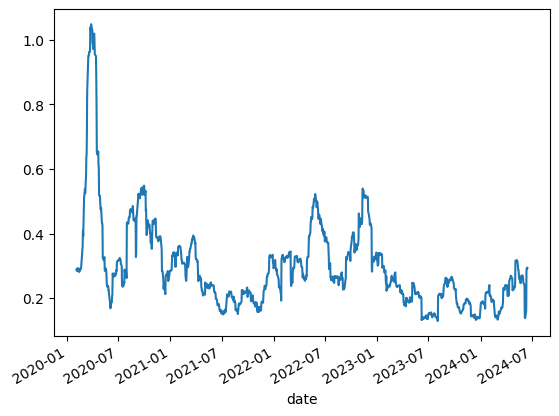

In [15]:
(close.pct_change().rolling(window=22).std() * np.sqrt(252)).plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Generating a cumulative return series

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" starting from 2021-01-01 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

In [4]:
display(df)

open        high         low       close     volume  \
date                                                                    
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900   
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900   
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000   
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200   
2021-01-08  132.429993  132.630005  130.229996  132.050003  105158200   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  
date                               
2021-01-04          0.0       0.0  
2021-01-05          0.0       0.0  
2021-01-06          0.0       0.0  
2021-01-07          0.0       0.0  
2021-01-08          0.0       0.0  
...                 ...       ...  
2024-06-10          0.0       0.0  
2024-06-11          0.0       0.0  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0  

[868 rows x 7 columns]

Selects the 'close' column from 'df' and stores it in 'close'

In [5]:
close = df["close"]

In [6]:
display(close)

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2024-06-10    193.119995
2024-06-11    207.149994
2024-06-12    213.070007
2024-06-13    214.240005
2024-06-14    212.490005
Name: close, Length: 868, dtype: float64

Calculates the percentage change of the 'close' prices and stores it in 'returns'

In [7]:
returns = close.pct_change()

In [8]:
display(returns)

date
2021-01-04         NaN
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2024-06-10   -0.019148
2024-06-11    0.072649
2024-06-12    0.028578
2024-06-13    0.005491
2024-06-14   -0.008168
Name: close, Length: 868, dtype: float64

Replaces NaN values in 'returns' with 0

In [9]:
returns[np.isnan(returns)] = 0

In [10]:
display(returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2024-06-10   -0.019148
2024-06-11    0.072649
2024-06-12    0.028578
2024-06-13    0.005491
2024-06-14   -0.008168
Name: close, Length: 868, dtype: float64

Adds 1 to the 'returns' to prepare for cumulative product calculation

In [11]:
returns += 1

In [12]:
display(returns)

date
2021-01-04    1.000000
2021-01-05    1.012364
2021-01-06    0.966338
2021-01-07    1.034123
2021-01-08    1.008631
                ...   
2024-06-10    0.980852
2024-06-11    1.072649
2024-06-12    1.028578
2024-06-13    1.005491
2024-06-14    0.991832
Name: close, Length: 868, dtype: float64

Calculates the cumulative returns and subtracts 1 to get the final cumulative returns

In [13]:
cumulative_returns = returns.cumprod() - 1

In [14]:
display(cumulative_returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.021714
2021-01-07    0.011668
2021-01-08    0.020400
                ...   
2024-06-10    0.492311
2024-06-11    0.600726
2024-06-12    0.646472
2024-06-13    0.655513
2024-06-14    0.641991
Name: close, Length: 868, dtype: float64

Plots the cumulative returns

<Axes: xlabel='date'>

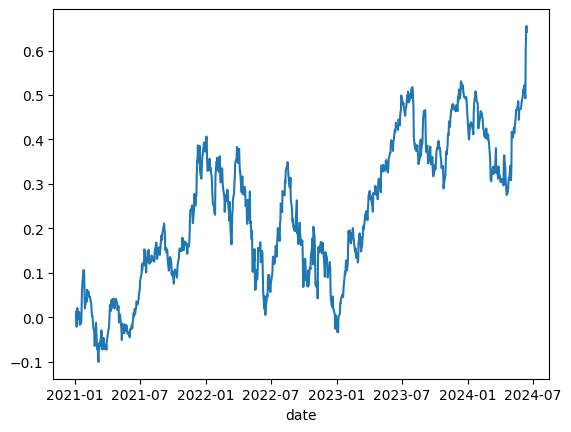

In [15]:
cumulative_returns.plot()

Calculates the log returns of 'close' prices

In [16]:
log_returns = np.log(close / close.shift())

In [17]:
display(log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.034241
2021-01-07    0.033554
2021-01-08    0.008594
                ...   
2024-06-10   -0.019333
2024-06-11    0.070131
2024-06-12    0.028178
2024-06-13    0.005476
2024-06-14   -0.008202
Name: close, Length: 868, dtype: float64

Calculates the cumulative sum of the log returns to get the cumulative log returns

In [18]:
cumulative_log_returns = log_returns.cumsum()

In [19]:
display(cumulative_log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.021953
2021-01-07    0.011601
2021-01-08    0.020195
                ...   
2024-06-10    0.400326
2024-06-11    0.470457
2024-06-12    0.498635
2024-06-13    0.504111
2024-06-14    0.495909
Name: close, Length: 868, dtype: float64

Plots the cumulative log returns

<Axes: xlabel='date'>

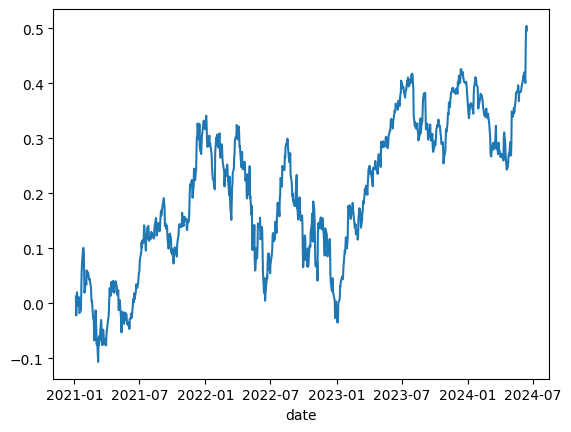

In [20]:
cumulative_log_returns.plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Resampling data for different time frames

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical intraday price data for the equity "AAPL" with 1-minute intervals using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", interval="1m", provider="yfinance")

In [4]:
display(df)

open        high         low       close   volume  \
date                                                                           
2024-06-10 09:30:00  197.199997  197.281693  196.410004  197.020004  3067393   
2024-06-10 09:31:00  196.990005  197.029999  196.699997  196.753494   414503   
2024-06-10 09:32:00  196.770004  196.800003  196.360001  196.565002   464379   
2024-06-10 09:33:00  196.559998  196.960007  196.550003  196.880005   284067   
2024-06-10 09:34:00  196.875000  196.939896  196.679993  196.820007   205338   
...                         ...         ...         ...         ...      ...   
2024-06-14 15:55:00  212.279999  212.490005  212.270096  212.434998   374658   
2024-06-14 15:56:00  212.434998  212.520004  212.413803  212.449997   448005   
2024-06-14 15:57:00  212.445007  212.500000  212.311005  212.490005   339171   
2024-06-14 15:58:00  212.500000  212.580002  212.490005  212.565002   479071   
2024-06-14 15:59:00  212.565002  212.587906  212.350006  212.520004  1061034   

                     split_ratio  dividend  
date                                        
2024-06-10 09:30:00          0.0       0.0  
2024-06-10 09:31:00          0.0       0.0  
2024-06-10 09:32:00          0.0       0.0  
2024-06-10 09:33:00          0.0       0.0  
2024-06-10 09:34:00          0.0       0.0  
...                          ...       ...  
2024-06-14 15:55:00          0.0       0.0  
2024-06-14 15:56:00          0.0       0.0  
2024-06-14 15:57:00          0.0       0.0  
2024-06-14 15:58:00          0.0       0.0  
2024-06-14 15:59:00          0.0       0.0  

[1947 rows x 7 columns]

Resamples the 'close' column of 'df' to hourly frequency and stores it in 'resampled'

In [5]:
resampled = df.resample(rule="h")["close"]

Displays the first value of each hour in the resampled data

In [6]:
resampled.first()

date
2024-06-10 09:00:00    197.020004
2024-06-10 10:00:00    195.399994
2024-06-10 11:00:00    195.354996
2024-06-10 12:00:00    195.190002
2024-06-10 13:00:00    195.645004
                          ...    
2024-06-14 11:00:00    213.063095
2024-06-14 12:00:00    212.301300
2024-06-14 13:00:00    211.945007
2024-06-14 14:00:00    212.270004
2024-06-14 15:00:00    212.074997
Freq: h, Name: close, Length: 103, dtype: float64

Displays the last value of each hour in the resampled data

In [7]:
resampled.last()

date
2024-06-10 09:00:00    195.410004
2024-06-10 10:00:00    195.384995
2024-06-10 11:00:00    195.229996
2024-06-10 12:00:00    195.619995
2024-06-10 13:00:00    194.949997
                          ...    
2024-06-14 11:00:00    212.550003
2024-06-14 12:00:00    212.179993
2024-06-14 13:00:00    212.372101
2024-06-14 14:00:00    212.164993
2024-06-14 15:00:00    212.520004
Freq: h, Name: close, Length: 103, dtype: float64

Calculates the mean of each hour in the resampled data

In [8]:
resampled.mean()

date
2024-06-10 09:00:00    195.933544
2024-06-10 10:00:00    195.369196
2024-06-10 11:00:00    195.432972
2024-06-10 12:00:00    195.801304
2024-06-10 13:00:00    195.285980
                          ...    
2024-06-14 11:00:00    213.249061
2024-06-14 12:00:00    211.905609
2024-06-14 13:00:00    211.949189
2024-06-14 14:00:00    212.011808
2024-06-14 15:00:00    212.134300
Freq: h, Name: close, Length: 103, dtype: float64

Calculates the open, high, low, and close (OHLC) for each hour in the resampled data

In [9]:
resampled.ohlc()

open        high         low       close
date                                                               
2024-06-10 09:00:00  197.020004  197.020004  195.210007  195.410004
2024-06-10 10:00:00  195.399994  195.710007  195.014999  195.384995
2024-06-10 11:00:00  195.354996  195.664993  195.119995  195.229996
2024-06-10 12:00:00  195.190002  196.198807  195.190002  195.619995
2024-06-10 13:00:00  195.645004  196.339996  193.509995  194.949997
...                         ...         ...         ...         ...
2024-06-14 11:00:00  213.063095  213.800003  212.535004  212.550003
2024-06-14 12:00:00  212.301300  212.490005  211.338699  212.179993
2024-06-14 13:00:00  211.945007  212.384995  211.412796  212.372101
2024-06-14 14:00:00  212.270004  212.360001  211.725006  212.164993
2024-06-14 15:00:00  212.074997  212.565002  211.485703  212.520004

[103 rows x 4 columns]

Converts 'df' to a daily frequency and stores it in 'ddf'

In [10]:
ddf = df.asfreq("D").to_period()

In [11]:
display(ddf)

open        high         low       close   volume  \
date                                                                  
2024-06-10  197.199997  197.281693  196.410004  197.020004  3067393   
2024-06-11  193.660004  194.589996  193.639999  194.304993  3043228   
2024-06-12  207.750000  207.850006  207.750000  207.835007  7180035   
2024-06-13  215.185394  215.229202  215.169998  215.205795  6325074   
2024-06-14  213.809998  214.114105  213.660004  214.089996  2328878   

            split_ratio  dividend  
date                               
2024-06-10          0.0       0.0  
2024-06-11          0.0       0.0  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0

Converts 'df' to a business day frequency and stores it in 'ddf'

In [12]:
ddf = df.asfreq(pd.offsets.BDay())

In [13]:
display(ddf)

open        high         low       close   volume  \
date                                                                           
2024-06-10 09:30:00  197.199997  197.281693  196.410004  197.020004  3067393   
2024-06-11 09:30:00  193.660004  194.589996  193.639999  194.304993  3043228   
2024-06-12 09:30:00  207.750000  207.850006  207.750000  207.835007  7180035   
2024-06-13 09:30:00  215.185394  215.229202  215.169998  215.205795  6325074   
2024-06-14 09:30:00  213.809998  214.114105  213.660004  214.089996  2328878   

                     split_ratio  dividend  
date                                        
2024-06-10 09:30:00          0.0       0.0  
2024-06-11 09:30:00          0.0       0.0  
2024-06-12 09:30:00          0.0       0.0  
2024-06-13 09:30:00          0.0       0.0  
2024-06-14 09:30:00          0.0       0.0

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Addressing missing data issues

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" from 2020-07-01 to 2023-07-06 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical(
    "AAPL",
    start_date="2020-07-01",
    end_date="2023-07-06",
    provider="yfinance",
)

In [4]:
display(df)

open        high         low       close     volume  \
date                                                                    
2020-07-01   91.279999   91.839996   90.977501   91.027496  110737200   
2020-07-02   91.962502   92.617500   90.910004   91.027496  114041600   
2020-07-06   92.500000   93.945000   92.467499   93.462502  118655600   
2020-07-07   93.852501   94.654999   93.057503   93.172501  112424400   
2020-07-08   94.180000   95.375000   94.089996   95.342499  117092000   
...                ...         ...         ...         ...        ...   
2023-06-29  189.080002  190.070007  188.940002  189.589996   46347300   
2023-06-30  191.630005  194.479996  191.259995  193.970001   85069600   
2023-07-03  193.779999  193.880005  191.759995  192.460007   31458200   
2023-07-05  191.570007  192.979996  190.619995  191.330002   46920300   
2023-07-06  189.839996  192.020004  189.199997  191.809998   45094300   

            split_ratio  dividend  
date                               
2020-07-01          0.0       0.0  
2020-07-02          0.0       0.0  
2020-07-06          0.0       0.0  
2020-07-07          0.0       0.0  
2020-07-08          0.0       0.0  
...                 ...       ...  
2023-06-29          0.0       0.0  
2023-06-30          0.0       0.0  
2023-07-03          0.0       0.0  
2023-07-05          0.0       0.0  
2023-07-06          0.0       0.0  

[758 rows x 7 columns]

Generates a date range from the minimum to maximum dates in 'df' with daily frequency and stores it in 'calendar_dates'

In [5]:
calendar_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")

In [6]:
display(calendar_dates)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06'],
              dtype='datetime64[ns]', length=1101, freq='D')

Reindexes 'df' to the 'calendar_dates', introducing missing values for non-trading days, and stores it in 'calendar_prices'

In [7]:
calendar_prices = df.reindex(calendar_dates)

In [8]:
display(calendar_prices)

open        high         low       close       volume  \
2020-07-01   91.279999   91.839996   90.977501   91.027496  110737200.0   
2020-07-02   91.962502   92.617500   90.910004   91.027496  114041600.0   
2020-07-03         NaN         NaN         NaN         NaN          NaN   
2020-07-04         NaN         NaN         NaN         NaN          NaN   
2020-07-05         NaN         NaN         NaN         NaN          NaN   
...                ...         ...         ...         ...          ...   
2023-07-02         NaN         NaN         NaN         NaN          NaN   
2023-07-03  193.779999  193.880005  191.759995  192.460007   31458200.0   
2023-07-04         NaN         NaN         NaN         NaN          NaN   
2023-07-05  191.570007  192.979996  190.619995  191.330002   46920300.0   
2023-07-06  189.839996  192.020004  189.199997  191.809998   45094300.0   

            split_ratio  dividend  
2020-07-01          0.0       0.0  
2020-07-02          0.0       0.0  
2020-07-03          NaN       NaN  
2020-07-04          NaN       NaN  
2020-07-05          NaN       NaN  
...                 ...       ...  
2023-07-02          NaN       NaN  
2023-07-03          0.0       0.0  
2023-07-04          NaN       NaN  
2023-07-05          0.0       0.0  
2023-07-06          0.0       0.0  

[1101 rows x 7 columns]

Backfills missing values in 'calendar_prices' and stores the result in 'df_1'

In [9]:
df_1 = calendar_prices.bfill()

In [10]:
display(df_1)

open        high         low       close       volume  \
2020-07-01   91.279999   91.839996   90.977501   91.027496  110737200.0   
2020-07-02   91.962502   92.617500   90.910004   91.027496  114041600.0   
2020-07-03   92.500000   93.945000   92.467499   93.462502  118655600.0   
2020-07-04   92.500000   93.945000   92.467499   93.462502  118655600.0   
2020-07-05   92.500000   93.945000   92.467499   93.462502  118655600.0   
...                ...         ...         ...         ...          ...   
2023-07-02  193.779999  193.880005  191.759995  192.460007   31458200.0   
2023-07-03  193.779999  193.880005  191.759995  192.460007   31458200.0   
2023-07-04  191.570007  192.979996  190.619995  191.330002   46920300.0   
2023-07-05  191.570007  192.979996  190.619995  191.330002   46920300.0   
2023-07-06  189.839996  192.020004  189.199997  191.809998   45094300.0   

            split_ratio  dividend  
2020-07-01          0.0       0.0  
2020-07-02          0.0       0.0  
2020-07-03          0.0       0.0  
2020-07-04          0.0       0.0  
2020-07-05          0.0       0.0  
...                 ...       ...  
2023-07-02          0.0       0.0  
2023-07-03          0.0       0.0  
2023-07-04          0.0       0.0  
2023-07-05          0.0       0.0  
2023-07-06          0.0       0.0  

[1101 rows x 7 columns]

Forward fills missing values in 'calendar_prices' and stores the result in 'df_1'

In [11]:
df_1 = calendar_prices.ffill()

In [12]:
display(df_1)

open        high         low       close       volume  \
2020-07-01   91.279999   91.839996   90.977501   91.027496  110737200.0   
2020-07-02   91.962502   92.617500   90.910004   91.027496  114041600.0   
2020-07-03   91.962502   92.617500   90.910004   91.027496  114041600.0   
2020-07-04   91.962502   92.617500   90.910004   91.027496  114041600.0   
2020-07-05   91.962502   92.617500   90.910004   91.027496  114041600.0   
...                ...         ...         ...         ...          ...   
2023-07-02  191.630005  194.479996  191.259995  193.970001   85069600.0   
2023-07-03  193.779999  193.880005  191.759995  192.460007   31458200.0   
2023-07-04  193.779999  193.880005  191.759995  192.460007   31458200.0   
2023-07-05  191.570007  192.979996  190.619995  191.330002   46920300.0   
2023-07-06  189.839996  192.020004  189.199997  191.809998   45094300.0   

            split_ratio  dividend  
2020-07-01          0.0       0.0  
2020-07-02          0.0       0.0  
2020-07-03          0.0       0.0  
2020-07-04          0.0       0.0  
2020-07-05          0.0       0.0  
...                 ...       ...  
2023-07-02          0.0       0.0  
2023-07-03          0.0       0.0  
2023-07-04          0.0       0.0  
2023-07-05          0.0       0.0  
2023-07-06          0.0       0.0  

[1101 rows x 7 columns]

Reindexes 'df' to the 'calendar_dates' and performs linear interpolation to fill missing values, storing the result in 'linear'

In [13]:
calendar_prices = df.reindex(calendar_dates)
linear = calendar_prices.interpolate(method="linear")

In [14]:
display(linear)

open        high         low       close        volume  \
2020-07-01   91.279999   91.839996   90.977501   91.027496  1.107372e+08   
2020-07-02   91.962502   92.617500   90.910004   91.027496  1.140416e+08   
2020-07-03   92.096876   92.949375   91.299377   91.636248  1.151951e+08   
2020-07-04   92.231251   93.281250   91.688751   92.244999  1.163486e+08   
2020-07-05   92.365625   93.613125   92.078125   92.853750  1.175021e+08   
...                ...         ...         ...         ...           ...   
2023-07-02  193.063334  194.080002  191.593328  192.963338  4.932867e+07   
2023-07-03  193.779999  193.880005  191.759995  192.460007  3.145820e+07   
2023-07-04  192.675003  193.430000  191.189995  191.895004  3.918925e+07   
2023-07-05  191.570007  192.979996  190.619995  191.330002  4.692030e+07   
2023-07-06  189.839996  192.020004  189.199997  191.809998  4.509430e+07   

            split_ratio  dividend  
2020-07-01          0.0       0.0  
2020-07-02          0.0       0.0  
2020-07-03          0.0       0.0  
2020-07-04          0.0       0.0  
2020-07-05          0.0       0.0  
...                 ...       ...  
2023-07-02          0.0       0.0  
2023-07-03          0.0       0.0  
2023-07-04          0.0       0.0  
2023-07-05          0.0       0.0  
2023-07-06          0.0       0.0  

[1101 rows x 7 columns]

Reindexes 'df' to the 'calendar_dates' and performs cubic spline interpolation to fill missing values, storing the result in 'cubic'

In [15]:
calendar_prices = df.reindex(calendar_dates)
cubic = calendar_prices.interpolate(method="cubicspline")

In [16]:
display(cubic)

open        high         low       close        volume  \
2020-07-01   91.279999   91.839996   90.977501   91.027496  1.107372e+08   
2020-07-02   91.962502   92.617500   90.910004   91.027496  1.140416e+08   
2020-07-03   91.905178   93.018261   91.109728   91.804272  1.181507e+08   
2020-07-04   91.628604   93.240770   91.492200   92.824548  1.213994e+08   
2020-07-05   91.653353   93.483519   91.972948   93.555050  1.221227e+08   
...                ...         ...         ...         ...           ...   
2023-07-02  194.071253  195.513330  192.326285  194.488423  5.806444e+07   
2023-07-03  193.779999  193.880005  191.759995  192.460007  3.145820e+07   
2023-07-04  192.906895  193.224617  191.295466  191.403875  3.331034e+07   
2023-07-05  191.570007  192.979996  190.619995  191.330002  4.692030e+07   
2023-07-06  189.839996  192.020004  189.199997  191.809998  4.509430e+07   

             split_ratio      dividend  
2020-07-01  0.000000e+00  0.000000e+00  
2020-07-02  0.000000e+00  0.000000e+00  
2020-07-03  3.592598e-24  1.363686e-15  
2020-07-04  7.185197e-24  2.727373e-15  
2020-07-05  7.185197e-24  2.727373e-15  
...                  ...           ...  
2023-07-02  0.000000e+00 -2.115795e-21  
2023-07-03  0.000000e+00  0.000000e+00  
2023-07-04  0.000000e+00  4.882604e-22  
2023-07-05  0.000000e+00  0.000000e+00  
2023-07-06  0.000000e+00  0.000000e+00  

[1101 rows x 7 columns]

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Applying custom functions to analyze time series data

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", provider="yfinance")

In [4]:
display(df)

open        high         low       close     volume  \
date                                                                    
2023-06-15  183.960007  186.520004  183.779999  186.009995   65433200   
2023-06-16  186.729996  186.990005  184.270004  184.919998  101235600   
2023-06-20  184.410004  186.100006  184.410004  185.009995   49799100   
2023-06-21  184.899994  185.410004  182.589996  183.960007   49515700   
2023-06-22  183.740005  187.050003  183.669998  187.000000   51245300   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  
date                               
2023-06-15          0.0       0.0  
2023-06-16          0.0       0.0  
2023-06-20          0.0       0.0  
2023-06-21          0.0       0.0  
2023-06-22          0.0       0.0  
...                 ...       ...  
2024-06-10          0.0       0.0  
2024-06-11          0.0       0.0  
2024-06-12          0.0       0.0  
2024-06-13          0.0       0.0  
2024-06-14          0.0       0.0  

[252 rows x 7 columns]

Applies a lambda function to calculate the difference between the high and low prices for each row

In [5]:
df.apply(lambda x: x["high"] - x["low"], axis=1)

date
2023-06-15     2.740005
2023-06-16     2.720001
2023-06-20     1.690002
2023-06-21     2.820007
2023-06-22     3.380005
                ...    
2024-06-10     5.150009
2024-06-11    13.529999
2024-06-12    13.300003
2024-06-13     5.149994
2024-06-14     3.869995
Length: 252, dtype: float64

Defines a function 'fcn' that calculates the difference between the high and low prices for each row

In [6]:
def fcn(row):
    return row["high"] - row["low"]

Applies the 'fcn' function to each row of 'df'

In [7]:
df.apply(fcn, axis=1)

date
2023-06-15     2.740005
2023-06-16     2.720001
2023-06-20     1.690002
2023-06-21     2.820007
2023-06-22     3.380005
                ...    
2024-06-10     5.150009
2024-06-11    13.529999
2024-06-12    13.300003
2024-06-13     5.149994
2024-06-14     3.869995
Length: 252, dtype: float64

Adds a new column 'valid' to 'df' that checks if the 'close' price is between 'low' and 'high' prices for each row

In [8]:
df["valid"] = df.apply(lambda x: x["low"] <= x["close"] <= x["high"], axis=1)

In [9]:
display(df)

open        high         low       close     volume  \
date                                                                    
2023-06-15  183.960007  186.520004  183.779999  186.009995   65433200   
2023-06-16  186.729996  186.990005  184.270004  184.919998  101235600   
2023-06-20  184.410004  186.100006  184.410004  185.009995   49799100   
2023-06-21  184.899994  185.410004  182.589996  183.960007   49515700   
2023-06-22  183.740005  187.050003  183.669998  187.000000   51245300   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  valid  
date                                      
2023-06-15          0.0       0.0   True  
2023-06-16          0.0       0.0   True  
2023-06-20          0.0       0.0   True  
2023-06-21          0.0       0.0   True  
2023-06-22          0.0       0.0   True  
...                 ...       ...    ...  
2024-06-10          0.0       0.0   True  
2024-06-11          0.0       0.0   True  
2024-06-12          0.0       0.0   True  
2024-06-13          0.0       0.0   True  
2024-06-14          0.0       0.0   True  

[252 rows x 8 columns]

Filters 'df' to create 'ddf' that contains rows where 'valid' is False

In [10]:
ddf = df[df.valid == False]

In [11]:
display(ddf)

Empty DataFrame
Columns: [open, high, low, close, volume, split_ratio, dividend, valid]
Index: []

Defines a function 'calculate_range' that calculates the range between 'high' and 'low' prices and returns it if it exceeds a threshold, otherwise returns NaN

In [12]:
def calculate_range(row, high_col, low_col, threshold):
    range = row[high_col] - row[low_col]
    return range if range > threshold else np.nan

Sets a threshold value

In [13]:
threshold = 1.5

Applies the 'calculate_range' function to each row of 'df' to calculate the range and adds it as a new column 'range'

In [14]:
df["range"] = df.apply(calculate_range, args=("high", "low", threshold), axis=1)

In [15]:
display(df)

open        high         low       close     volume  \
date                                                                    
2023-06-15  183.960007  186.520004  183.779999  186.009995   65433200   
2023-06-16  186.729996  186.990005  184.270004  184.919998  101235600   
2023-06-20  184.410004  186.100006  184.410004  185.009995   49799100   
2023-06-21  184.899994  185.410004  182.589996  183.960007   49515700   
2023-06-22  183.740005  187.050003  183.669998  187.000000   51245300   
...                ...         ...         ...         ...        ...   
2024-06-10  196.899994  197.300003  192.149994  193.119995   97262100   
2024-06-11  193.649994  207.160004  193.630005  207.149994  172373300   
2024-06-12  207.369995  220.199997  206.899994  213.070007  198134300   
2024-06-13  214.740005  216.750000  211.600006  214.240005   97862700   
2024-06-14  213.850006  215.169998  211.300003  212.490005   69175600   

            split_ratio  dividend  valid      range  
date                                                 
2023-06-15          0.0       0.0   True   2.740005  
2023-06-16          0.0       0.0   True   2.720001  
2023-06-20          0.0       0.0   True   1.690002  
2023-06-21          0.0       0.0   True   2.820007  
2023-06-22          0.0       0.0   True   3.380005  
...                 ...       ...    ...        ...  
2024-06-10          0.0       0.0   True   5.150009  
2024-06-11          0.0       0.0   True  13.529999  
2024-06-12          0.0       0.0   True  13.300003  
2024-06-13          0.0       0.0   True   5.149994  
2024-06-14          0.0       0.0   True   3.869995  

[252 rows x 9 columns]

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.